# Logistic Regression

## Lead Scoring Case Study

### Problem statement: 
    Build a logistic regression model that predicts the likelihood of a lead converting into a customer, with the output being a lead score between 0 and 100. A higher score will indicate a higher likelihood of conversion, while a lower score will indicate a lower likelihood. Help the marketing team strive toward an 80% conversion rate by using the model to identify the "Hot Leads" most likely to convert. Ensure the model can handle future changes in the company’s lead generation process, data, or conversion goals by keeping it adaptive and updated.


### Steps in building the Model:

    1.Data Overview
    2.Data Preprocessing
    3.Performing Exploratory Data Analysis(EDA) 
    4.Data Preparation
    5.Model Building
    6.Model Evaluation
    7.Model Performance
    8.Conclusion

## Step 1: Load and understand the Data
This step helps us understand the data and identify any immediate issues(such as incorrect datatype)

In [1]:
# Import the required libraries and load the data
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
df = pd.read_csv('Leads.csv')

print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [3]:
# Understand the data
df.shape

(9240, 37)

In [4]:
# Check the data types
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
# Get basic statistics of numerical columns
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Preprocessing
This step handles both numerical and categorical variables methodically with particular attention to the issue of the 'Select' level in categorical variables.

    1.Inspect the dataframe
    2.Data Cleaning
    3.Handling Binary Features
    4.Handling Categorical Features
    5.Handling Outliers
    6.Handling Numerical Features

### 2.1.Inspect the DataFrame

In [6]:
df.isnull().sum() 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Finding the null percentages across columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

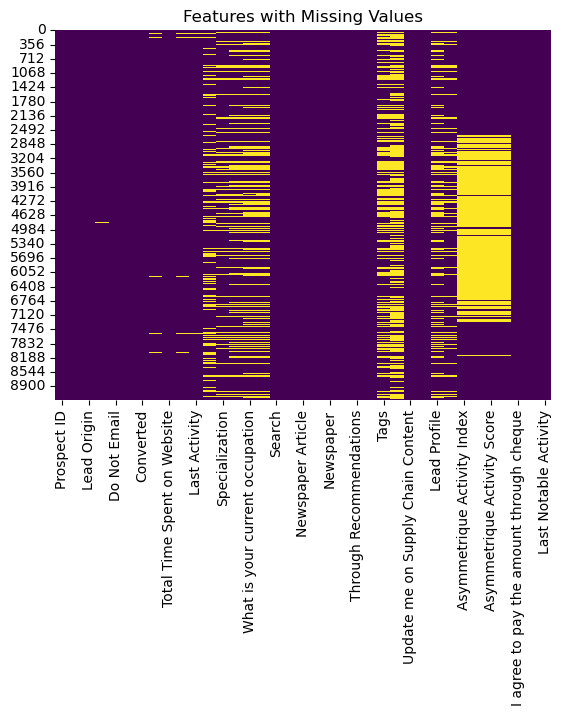

In [8]:
#Visualize missing values using a heatmap 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Features with Missing Values")
plt.show()

#### Observations

    - We have missing values for some features greater than 40%, lets perform correlation analysis on these features before dropping it.

In [9]:
# Split the features under Categorical and Numerical

# Get all categorical columns
categorical_features = df.select_dtypes(include=['object']).columns  

# Get all numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

#### The 'Prospect ID' and 'Lead Number' are the unique identifiers and don't hold any meaningful value for the model, so they can be dropped.

In [10]:
# Check the unique value counts for each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")


Column: Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64


Column: Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64


Column: Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Column: Lead Source
Google               2868
Direct Tra

In [11]:
# Droppping the unique identifiers

df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [12]:
# Update the features under Categorical and Numerical

# Get all categorical columns
categorical_features = df.select_dtypes(include=['object']).columns  

# Get all numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

### 2.2. Data Cleaning

#### Handling 'Select' level in the Categorical Features
        - Replace 'select' with NaN to treat it as a missing value.
        - After replacing with Nan, we can handle the missing values in these columns using imputation.

In [13]:
# Check which categorical columns have 'Select' value

select_columns = [col for col in categorical_features if df[col].str.contains('Select').any()]
print(select_columns)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [14]:
# Replace 'Select' with NaN in the identified columns

for col in select_columns:
    df[col] = df[col].replace('Select', np.nan)

#### Dropping the column extreme dominance

    - After looking into the unique values of the categorical features, we can see the 'What matters most to you in choosing a course' having three different categories, but a single value is more dominant.
    - We can drop this column as it is not going to benefit the model

In [15]:
# Drop the column 
df = df.drop(['What matters most to you in choosing a course', 'Search'],axis=1)

#### Removing columns having one unique value
    - We have columns with one unique value and some columns which are mostly dominated by a single value.
    - It is a good practice to remove such columns during preprocessing.
    - These columns do not add any predictive power to the model and can make the model unnecessarily complex.

In [16]:
columns_with_one_unique_value = df.columns[df.nunique() == 1]

# Display the columns with one unique value
print("Columns with one unique value:")
print(columns_with_one_unique_value)

Columns with one unique value:
Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')


In [17]:
# Remove columns with only one unique value as the columns has no variability and wouldnt contribute any useful information to the model
df = df.loc[:, df.nunique() > 1]

In [18]:
# Lead source

#Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [19]:
# Last Activity

# We can club the last activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [20]:
# Verify the dataframe after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          5860 non-null   obje

In [21]:
# Finding the null percentages across columns
round(df.isnull().sum()/len(df.index),2)*100

Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Do Not Call                                0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                   27.0
Specialization                            37.0
How did you hear about X Education        78.0
What is your current occupation           29.0
Newspaper Article                          0.0
X Education Forums                         0.0
Newspaper                                  0.0
Digital Advertisement                      0.0
Through Recommendations                    0.0
Tags                                      36.0
Lead Quality                              52.0
Lead Profile                              74.0
City         

In [22]:
# Print the columns with null percentage above 40
null_percentages = round(df.isnull().sum() / len(df.index), 2) * 100
columns_above_40 = null_percentages[null_percentages > 40]
print(columns_above_40)


How did you hear about X Education    78.0
Lead Quality                          52.0
Lead Profile                          74.0
Asymmetrique Activity Index           46.0
Asymmetrique Profile Index            46.0
Asymmetrique Activity Score           46.0
Asymmetrique Profile Score            46.0
dtype: float64


#### Observations:

    - Drop the 'How did you hear about X Education'column with 78% missing value
    - Before dropping other columns, we can perform meaningful imputation and analyze the predictive power of those features

In [23]:
# Drop the column as it has 78% missing value
df= df.drop(columns=['How did you hear about X Education'])

In [24]:
# Update the features under Categorical and Numerical after cleaning and dropping

# Get all categorical columns
categorical_features = df.select_dtypes(include=['object']).columns  

# Get all numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          5860 non-null   obje

### 2.3 Handling Binary Features

In [26]:
# Identify binary categorical columns
binary_features = []

# Loop through all categorical columns to check for binary values
for col in categorical_features:
    unique_values = df[col].unique()  # Get unique values of the column
    if set(unique_values).issubset({'Yes', 'No'}):  # Check if the unique values are only 'Yes' and 'No'
        binary_features.append(col)

# Remove binary columns from categorical features
categorical_features = [col for col in categorical_features if col not in binary_features]

# Display the updated categorical features
print("Categorical features excluding binary features:", categorical_features)

# Replace binary features ('Yes' -> 1, 'No' -> 0)
for col in binary_features:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Verify the replacement
print(df[binary_features].head())  # Display the first few rows of the binary features to verify


Categorical features excluding binary features: ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']
   Do Not Email  Do Not Call  Newspaper Article  X Education Forums  \
0             0            0                  0                   0   
1             0            0                  0                   0   
2             0            0                  0                   0   
3             0            0                  0                   0   
4             0            0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0           

#### 2.3.2 Grouping the Features
    - We have some columns that has been dominated by a single value, so we can combine the features to represent the same information in a more compact form.

In [27]:
# Create a new feature to indicate whether the customer came through any marketing channels
df['Came Through Marketing Channels'] = df[['Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']].sum(axis=1)

In [28]:
# Create a new feature flagging customers who opted out of communication
df['Not Interested in Contact'] = df['Do Not Call'] | df['Do Not Email']

In [29]:
# Drop the original columns after grouping the features
df.drop(['Do Not Call','Do Not Email','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)


In [30]:
# Verify the features after dropping
df.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Tags                                       object
Lead Quality                               object
Lead Profile                               object
City                                       object
Asymmetrique Activity Index                object
Asymmetrique Profile Index                 object
Asymmetrique Activity Score               float64
Asymmetrique Profile Score                float64
A free copy of Mastering The Interview      int64
Last Notable Activity                      object


### 2.3. Handling Categorical Features
    
    1.We will impute missing values using the mode and for the columns with high percentage of missing values we can impute with a specific value 'Unknown'.
    2.After handling the missing values, we can proceed with encoding the categocial variables.

In [31]:
# Impute missing values with the mode for each categorical column
categorical_columns_with_missing = [
    'Lead Source', 'Last Activity', 'What is your current occupation', 
    'Tags', 'Lead Quality'
]

for col in categorical_columns_with_missing:
    mode_value = df[col].mode()[0]  # Find the most frequent value
    df[col].fillna(mode_value, inplace=True)


In [32]:
# Impute missing values with 'Unknown' for columns with many missing values
columns_to_impute_with_unknown = ['Country', 'Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Specialization', 'City']
for col in columns_to_impute_with_unknown:
    df[col].fillna('Unknown', inplace=True)


In [33]:
for col in categorical_features:
    print(f"Missing values in column '{col}': {df[col].isnull().sum()}")

Missing values in column 'Lead Origin': 0
Missing values in column 'Lead Source': 0
Missing values in column 'Last Activity': 0
Missing values in column 'Country': 0
Missing values in column 'Specialization': 0
Missing values in column 'What is your current occupation': 0
Missing values in column 'Tags': 0
Missing values in column 'Lead Quality': 0
Missing values in column 'Lead Profile': 0
Missing values in column 'City': 0
Missing values in column 'Asymmetrique Activity Index': 0
Missing values in column 'Asymmetrique Profile Index': 0
Missing values in column 'Last Notable Activity': 0


In [34]:
unique_values = {col: df[col].unique() for col in categorical_features}

# Check the unique value counts for each column
for col in unique_values:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")



Column: Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Column: Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64


Column: Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other_Activity                 51
Name: Last Activity, dtype: int64


Column: Country
India                   6492
Unknown                 2461
U

#### Grouping the Features

In [35]:
# 'Country'
# Sample frequency distribution of 'Country'
country_counts = df['Country'].value_counts()

# Set a threshold for keeping countries as separate categories
threshold = 50

# Group countries with fewer than `threshold` occurrences as "Other"
df['Country_grouped'] = df['Country'].apply(lambda x: x if country_counts[x] >= threshold else 'Other')

# Check the new distribution of countries
print(df['Country_grouped'].value_counts())

India                   6492
Unknown                 2461
Other                    165
United States             69
United Arab Emirates      53
Name: Country_grouped, dtype: int64


In [36]:
# 'Tags'
# Frequency distribution of Tags
tag_counts = df['Tags'].value_counts()

# Define thresholds for rare tags (e.g., appearing less than 100 times)
threshold = 100

# Group rare tags into an 'Other' category
df['Tags_grouped'] = df['Tags'].apply(lambda x: x if tag_counts[x] >= threshold else 'Other')

# Further group by meaningful categories (this is a custom grouping based on business context)
tag_mapping = {
    'Will revert after reading the email': 'Follow-up',
    'Ringing': 'Follow-up',
    'Interested in other courses': 'Interest Level',
    'Already a student': 'Status',
    'Closed by Horizzon': 'Status',
    'switched off': 'Not Interested',
    'Busy': 'Follow-up',
    'Lost to EINS': 'Not Interested',
    'Not doing further education': 'Not Interested',
    'Interested in full time MBA': 'Interest Level',
    'Graduation in progress': 'Interest Level',
    'invalid number': 'Not Interested',
    'Diploma holder (Not Eligible)': 'Not Interested',
    'wrong number given': 'Not Interested',
    'opp hangup': 'Not Interested',
    'number not provided': 'Not Interested',
    'in touch with EINS': 'Status',
    'Lost to Others': 'Not Interested',
    'Still Thinking': 'Follow-up',
    'Want to take admission but has financial problems': 'Follow-up',
    'In confusion whether part time or DLP': 'Follow-up',
    'Interested in Next batch': 'Follow-up',
    'Lateral student': 'Other',
    'Shall take in the next coming month': 'Follow-up',
    'University not recognized': 'Not Interested',
    'Recognition issue (DEC approval)': 'Not Interested'
}

# Apply the manual grouping
df['Tags_grouped'] = df['Tags_grouped'].map(tag_mapping).fillna('Other')

# Check the frequency of the simplified tags
print(df['Tags_grouped'].value_counts())

Follow-up         6814
Status             823
Interest Level     624
Not Interested     560
Other              419
Name: Tags_grouped, dtype: int64


In [37]:
'Last Notable Activity'
# Frequency distribution of 'Last Notable Activity' column
last_notable_activity_counts = df['Last Notable Activity'].value_counts()

# Define a mapping to simplify the 'Last Notable Activity' column
activity_mapping = {
    'Modified': 'Activity-related',
    'Email Opened': 'Email-related',
    'SMS Sent': 'SMS-related',
    'Page Visited on Website': 'Website-related',
    'Olark Chat Conversation': 'Chat-related',
    'Email Link Clicked': 'Email-related',
    'Email Bounced': 'Email-related',
    'Unsubscribed': 'Subscription-related',
    'Unreachable': 'Phone-related',
    'Had a Phone Conversation': 'Phone-related',
    'Email Marked Spam': 'Email-related',
    'Approached upfront': 'Other',
    'Resubscribed to emails': 'Subscription-related',
    'View in browser link Clicked': 'Other',
    'Form Submitted on Website': 'Website-related',
    'Email Received': 'Email-related'
}

# Map the activities using the defined mapping
df['Last_Notable_Activity_grouped'] = df['Last Notable Activity'].map(activity_mapping).fillna('Other')

# Check the frequency distribution of the simplified column
print(df['Last_Notable_Activity_grouped'].value_counts())

Activity-related        3407
Email-related           3063
SMS-related             2172
Website-related          319
Chat-related             183
Subscription-related      48
Phone-related             46
Other                      2
Name: Last_Notable_Activity_grouped, dtype: int64


In [38]:
# Drop the original columns after grouping
df.drop(['Country', 'Tags', 'Last Notable Activity'], axis=1, inplace=True)

In [39]:
# Update the features under Categorical and Numerical after cleaning and dropping

# Get all categorical columns
categorical_features = df.select_dtypes(include=['object']).columns  

# Get all numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [40]:
# Verify the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Lead Quality                            9240 non-null   object 
 10  Lead Profile                            9240 non-null   obje

### 2.4. Handling Numerical Features
   
    1. Asymmetrique Activity Score, and Asymmetrique Profile Score have a large number of missing values (around 4218), Check for the correlation with the Target variable.
    2. TotalVisits and Page Views Per Visit, the missing values can be imputed with the mean since they have fewer missing values.

In [41]:
# Check fo the missing value counts 
for col in numerical_features:
    print(f"Missing values in column '{col}': {df[col].isnull().sum()}")

Missing values in column 'Converted': 0
Missing values in column 'TotalVisits': 137
Missing values in column 'Total Time Spent on Website': 0
Missing values in column 'Page Views Per Visit': 137
Missing values in column 'Asymmetrique Activity Score': 4218
Missing values in column 'Asymmetrique Profile Score': 4218
Missing values in column 'A free copy of Mastering The Interview': 0
Missing values in column 'Came Through Marketing Channels': 0
Missing values in column 'Not Interested in Contact': 0


In [42]:
# Check for the columns with high missing values
df[['Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Converted']].corr()

,Asymmetrique Activity Score,Asymmetrique Profile Score,Converted
Asymmetrique Activity Score,1.000000,-0.123250,0.167962
Asymmetrique Profile Score,-0.123250,1.000000,0.218571
Converted,0.167962,0.218571,1.000000


    - These correlations are positive but weak, meaning that while they do have some predictive power in relation to the target (conversion), the relationship is not very strong.
    - Try imputing the missing values and check the correlation after imputation

In [43]:
df['Asymmetrique Activity Score'].fillna(df['Asymmetrique Activity Score'].median(), inplace=True)
df['Asymmetrique Profile Score'].fillna(df['Asymmetrique Profile Score'].median(), inplace=True)

print(df[['Asymmetrique Activity Score', 'Asymmetrique Profile Score']].isnull().sum())

Asymmetrique Activity Score    0
Asymmetrique Profile Score     0
dtype: int64


In [44]:
# Recalculate the correlation matrix
correlation_matrix = df[['Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Converted']].corr()
print(correlation_matrix)


                             Asymmetrique Activity Score  \
Asymmetrique Activity Score                     1.000000   
Asymmetrique Profile Score                     -0.102070   
Converted                                       0.120331   

                             Asymmetrique Profile Score  Converted  
Asymmetrique Activity Score                   -0.102070   0.120331  
Asymmetrique Profile Score                     1.000000   0.157824  
Converted                                      0.157824   1.000000  


    - These features still have weak predictive power after imputation, meaning they don't seem to significantly improve the predictive performance of the model.
    - So, dropping these columns can be a reasonable choice..

In [45]:
# Drop the columns 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score'
df = df.drop(columns=['Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

# Verify the dataset after dropping the columns
print(f"Shape of the dataset after dropping the columns: {df.shape}")


Shape of the dataset after dropping the columns: (9240, 20)


In [46]:
# After removing columns (like 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score')
# Update the numerical_features list to include only the remaining numerical columns

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [47]:
# check the skewness of the other two columns
print("Skewness of 'TotalVisits':", df['TotalVisits'].skew())
print("Skewness of 'Page Views Per Visit':", df['Page Views Per Visit'].skew())

Skewness of 'TotalVisits': 19.911657340056212
Skewness of 'Page Views Per Visit': 2.871792896566408


In [48]:
# Use median imputation for 'TotalVisits' and 'Page Views Per Visit'
median_imputer = SimpleImputer(strategy='median')
df[['TotalVisits', 'Page Views Per Visit']] = median_imputer.fit_transform(df[['TotalVisits', 'Page Views Per Visit']])

# Verify the imputation by checking the number of missing values again
print(df[['TotalVisits', 'Page Views Per Visit']].isnull().sum())

TotalVisits             0
Page Views Per Visit    0
dtype: int64


In [49]:
# Check for the missing value counts 
for col in numerical_features:
    print(f"Missing values in column '{col}': {df[col].isnull().sum()}")

Missing values in column 'Converted': 0
Missing values in column 'TotalVisits': 0
Missing values in column 'Total Time Spent on Website': 0
Missing values in column 'Page Views Per Visit': 0
Missing values in column 'A free copy of Mastering The Interview': 0
Missing values in column 'Came Through Marketing Channels': 0
Missing values in column 'Not Interested in Contact': 0


In [50]:
# checkthe datatype after imputation
df.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Lead Quality                               object
Lead Profile                               object
City                                       object
Asymmetrique Activity Index                object
Asymmetrique Profile Index                 object
A free copy of Mastering The Interview      int64
Came Through Marketing Channels             int64
Not Interested in Contact                   int64
Country_grouped                            object
Tags_grouped                               object
Last_Notable_Activity_grouped              object


### 2.4.Handling Outliers

In [51]:
df[numerical_features]

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Came Through Marketing Channels,Not Interested in Contact
0,0,0.0,0,0.00,0,0,0
1,0,5.0,674,2.50,0,0,0
2,1,2.0,1532,2.00,1,0,0
3,0,1.0,305,1.00,0,0,0
4,1,2.0,1428,1.00,0,0,0
...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,1
9236,0,2.0,238,2.00,1,0,0
9237,0,2.0,199,2.00,1,0,1
9238,1,3.0,499,3.00,0,0,0


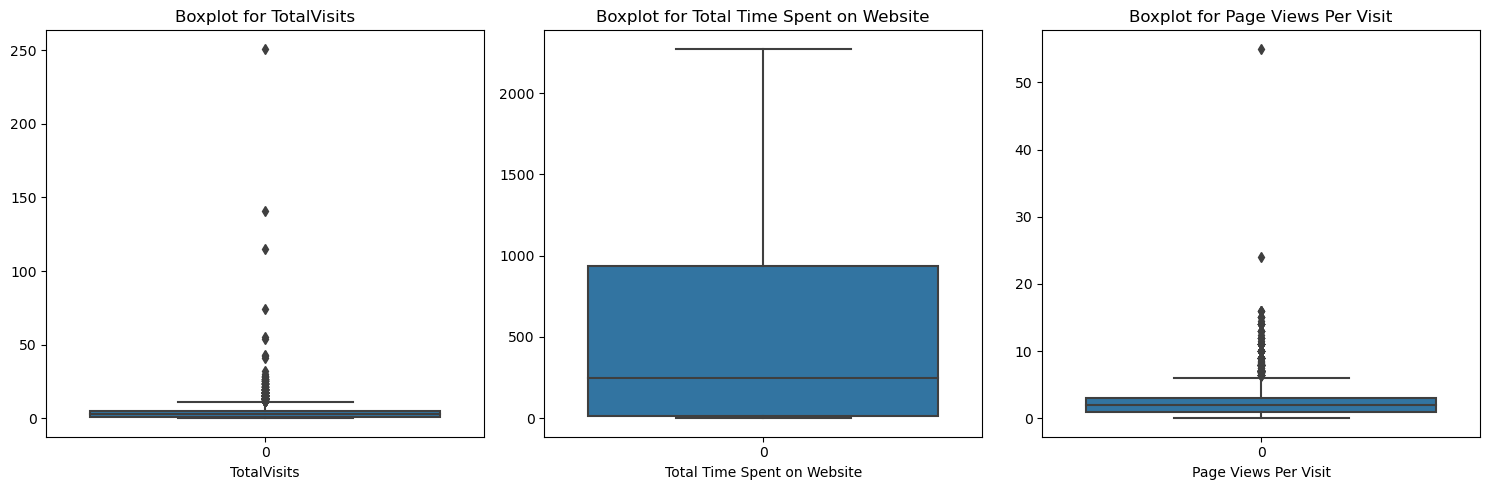

In [52]:
#Checking for Outliers

# Columns to plot boxplots
columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a boxplot for each of the columns
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [53]:
# Calculate the 5th and 95th percentiles for each column
lower_percentile = 0.05
upper_percentile = 0.95

# List of columns to cap
columns_to_cap = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Apply capping based on percentiles
for column in columns_to_cap:
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    
    # Apply the capping
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Display the first few rows of the modified data
print(df[columns_to_cap].head())

   TotalVisits  Total Time Spent on Website  Page Views Per Visit
0          0.0                          0.0                   0.0
1          5.0                        674.0                   2.5
2          2.0                       1532.0                   2.0
3          1.0                        305.0                   1.0
4          2.0                       1428.0                   1.0


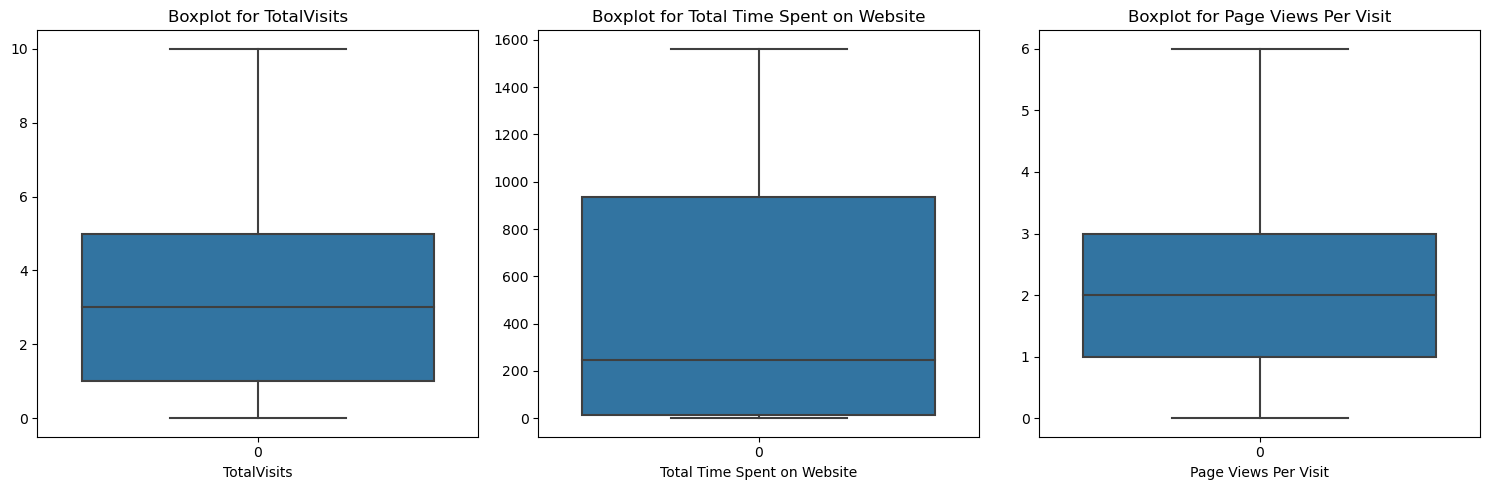

In [54]:
#Re-Check for Outliers after capping

# Columns to plot boxplots
columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a boxplot for each of the columns
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [55]:
# Check for any missing values after outlier removal
missing_values = df.isnull().sum()
print(missing_values)


Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Lead Quality                              0
Lead Profile                              0
City                                      0
Asymmetrique Activity Index               0
Asymmetrique Profile Index                0
A free copy of Mastering The Interview    0
Came Through Marketing Channels           0
Not Interested in Contact                 0
Country_grouped                           0
Tags_grouped                              0
Last_Notable_Activity_grouped             0
dtype: int64


## Step 3: Performing EDA

EDA allows you to understand the dataset, detect patterns, identify potential issues, and guide the preprocessing steps needed to handle the data effectively.Binary Features has been excluded in the EDA during the initial stages to avoid unnecessary clutter in the analysis.

    1. Explore the Target Variable
    2. Perform Univariate Analysis for Categorical and Numerical features
    3. Perform Segmented Univariate Analysis based on the Target variable
    4. Perform Bivariate Analysis

### 3.1. Explore the Target Variable

In [56]:
# Identify the distribution of the Target variable

target_count = df['Converted'].value_counts()
target_perc = df['Converted'].value_counts(normalize = True) * 100

print(target_count)
print(target_perc)

0    5679
1    3561
Name: Converted, dtype: int64
0    61.461039
1    38.538961
Name: Converted, dtype: float64


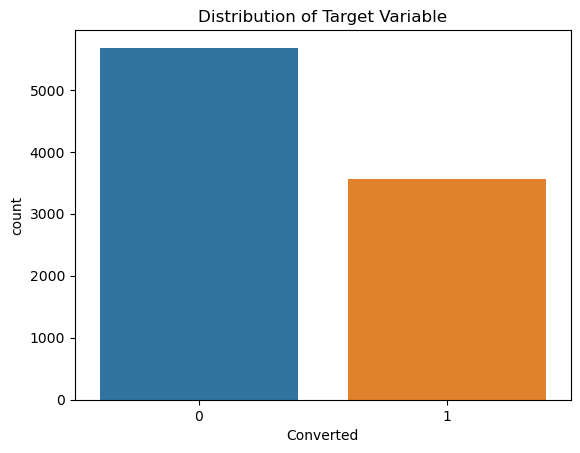

In [57]:
# Check the distribution of the target variable to if the data is imbalanced

sns.countplot(x='Converted', data=df)
plt.title("Distribution of Target Variable")
plt.show()

#### Observations:

    - The target variable has a higher number of non-converted leads (0) compared to converted leads (1), the dataset is imbalanced. 
    - To handle the imbalance, we can use class weights during training to make the model more sensitive to the minority class.

### 3.2.Univariate Analysis

### Check Categorical Features

In [58]:
# Identify unique categories in each categorical feature

for col in categorical_features:
    print(f'\nFrequency distribution for {col}:')
    print(df[col].value_counts())
    print()


Frequency distribution for Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Frequency distribution for Lead Source:
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64


Frequency distribution for Last Activity:
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other_Activity                 51
Name: Last Activity, dtype: int64


Frequency dist

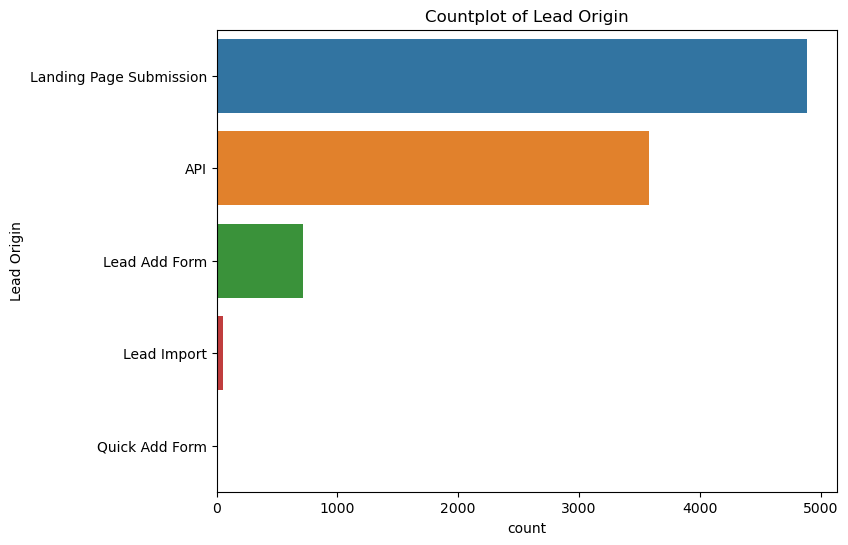

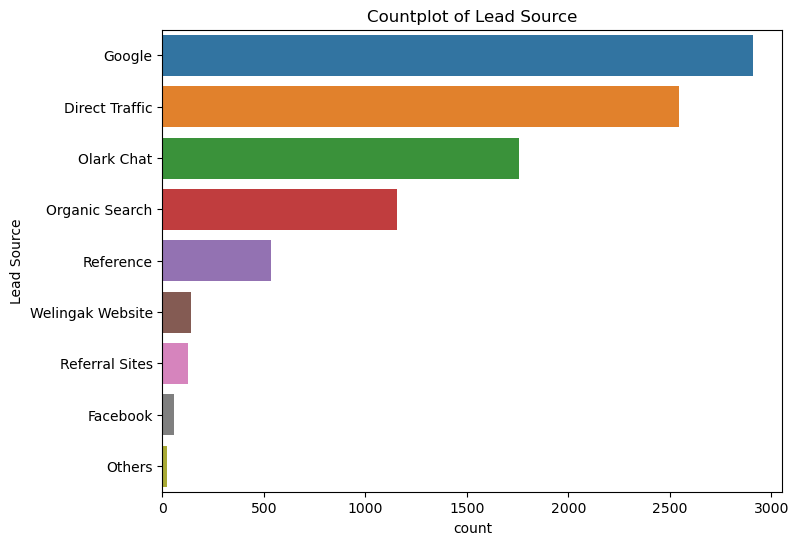

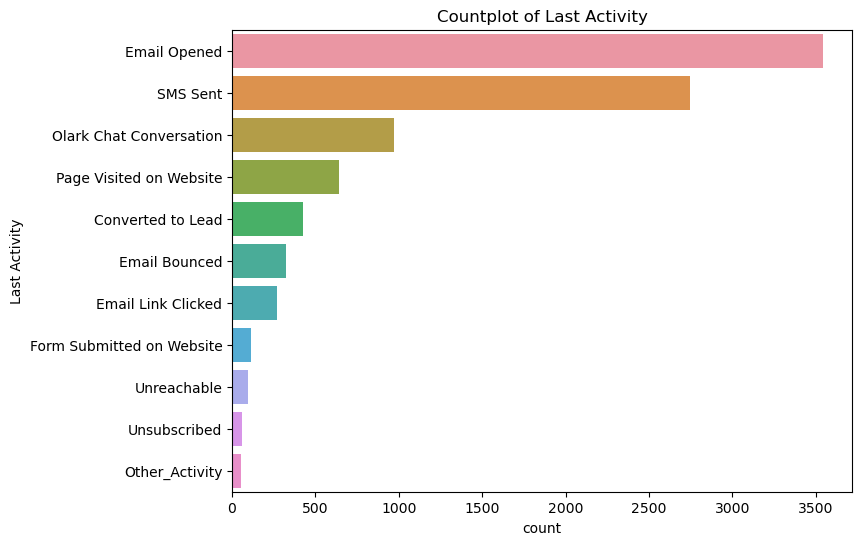

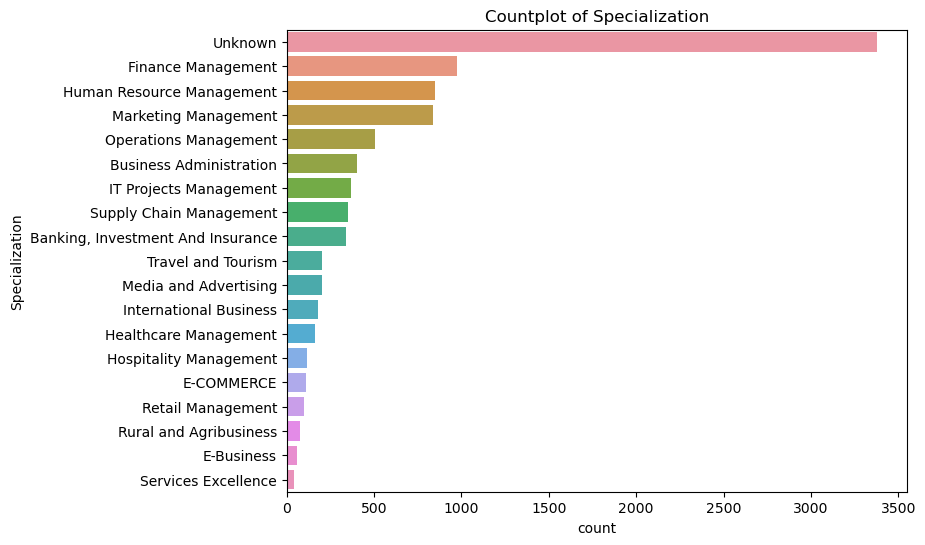

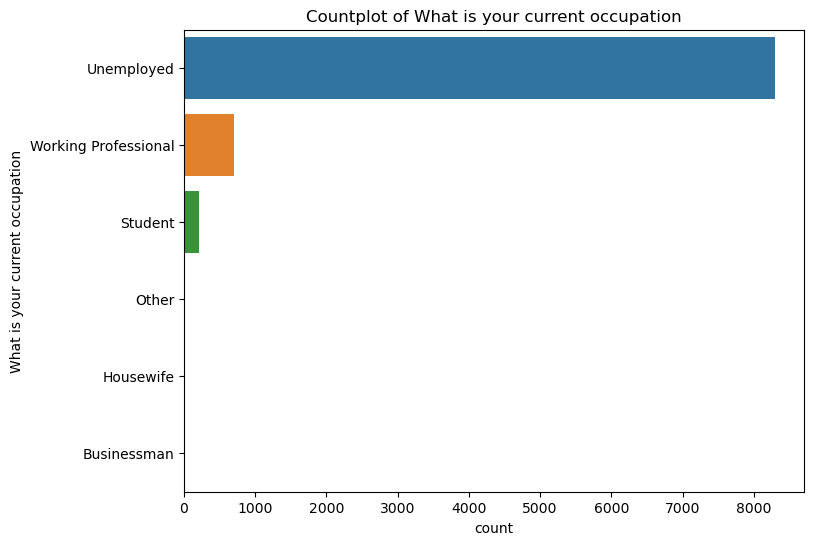

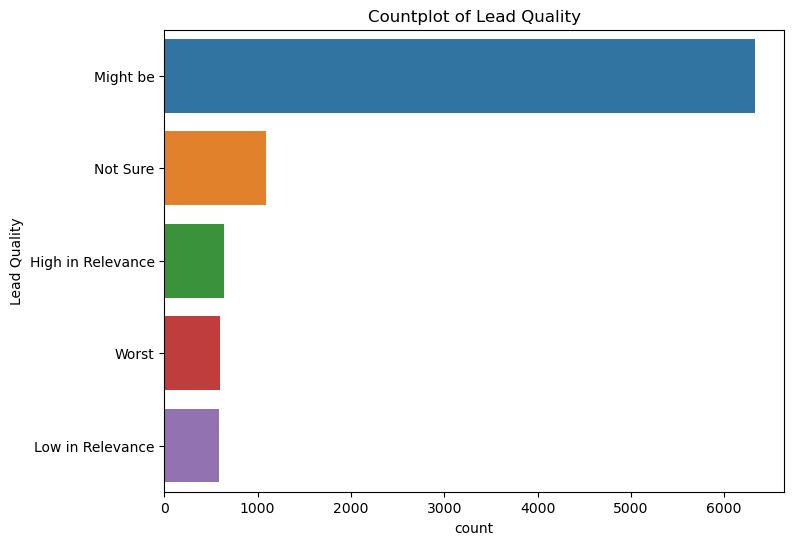

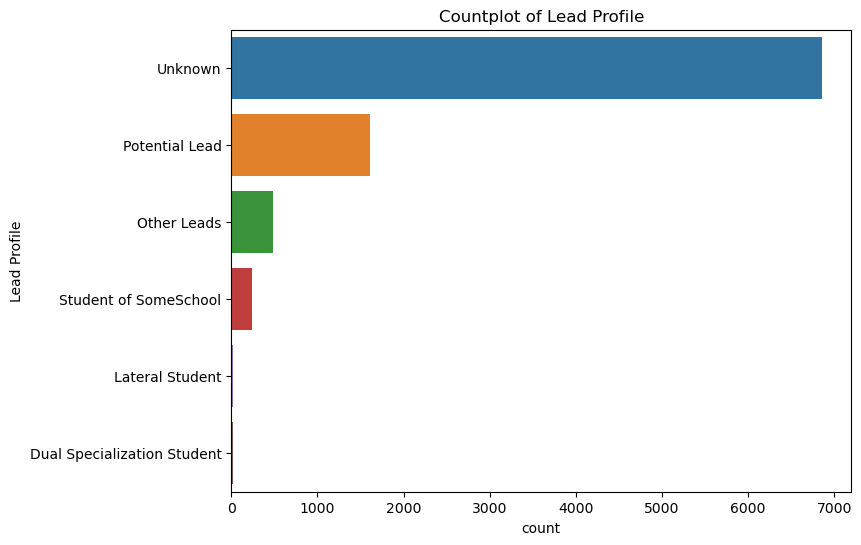

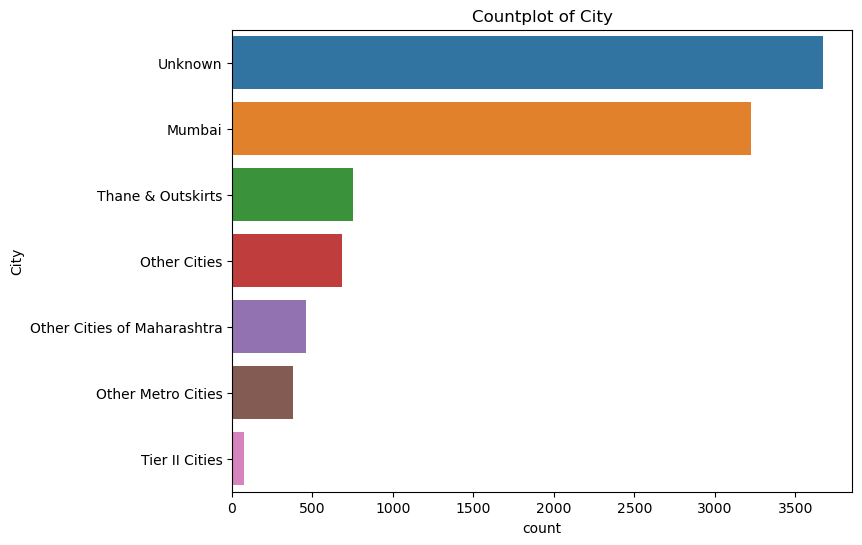

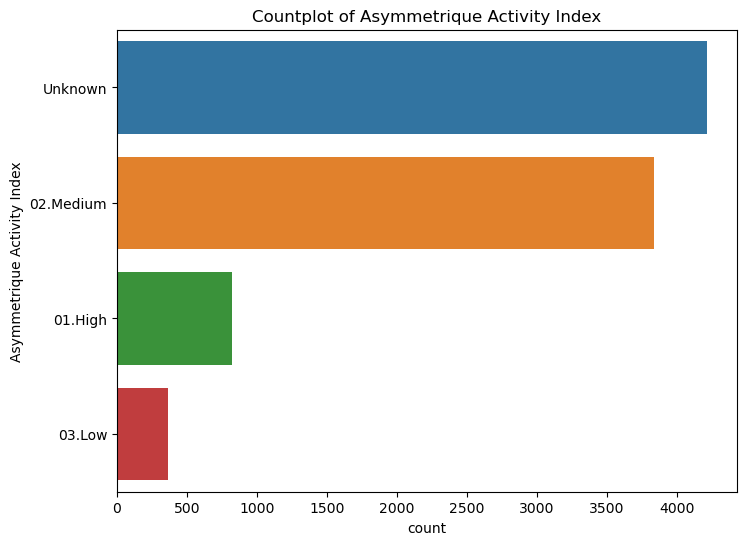

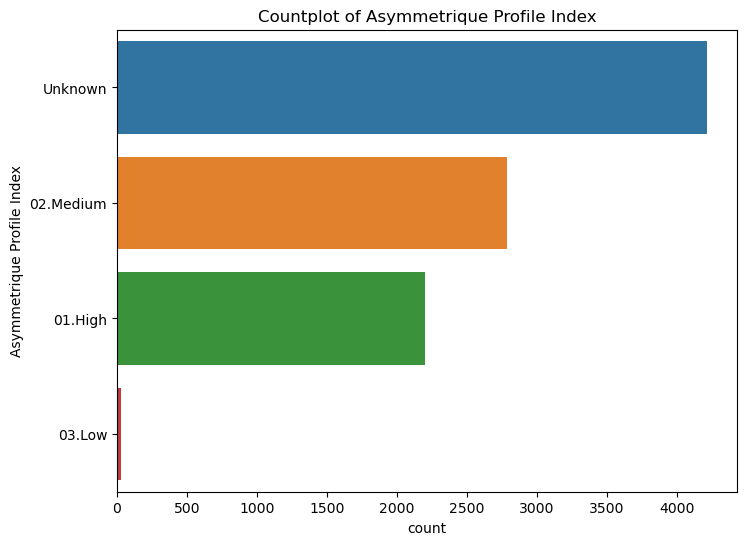

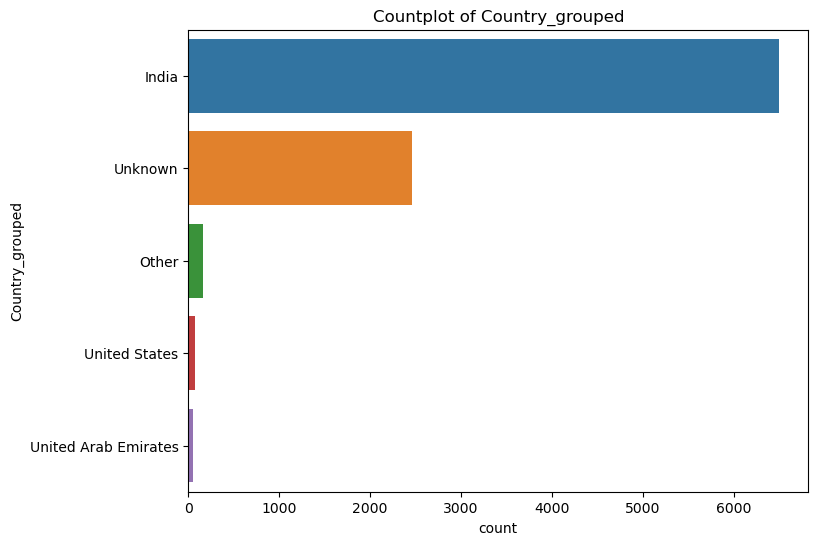

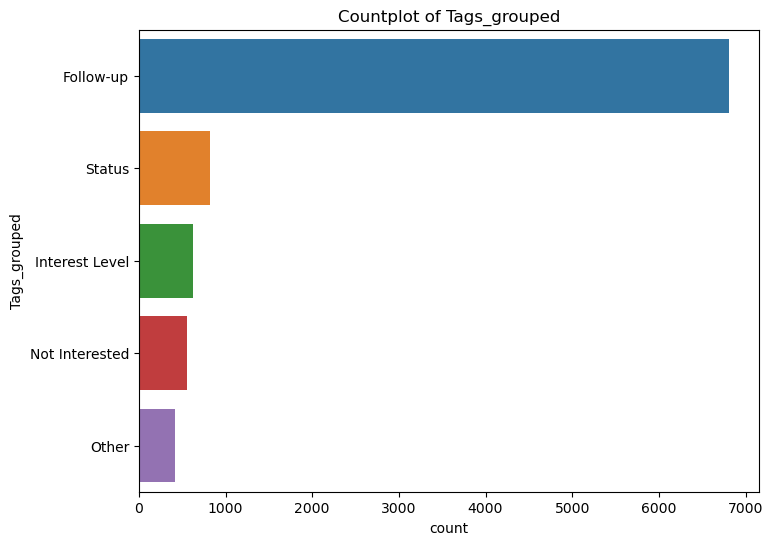

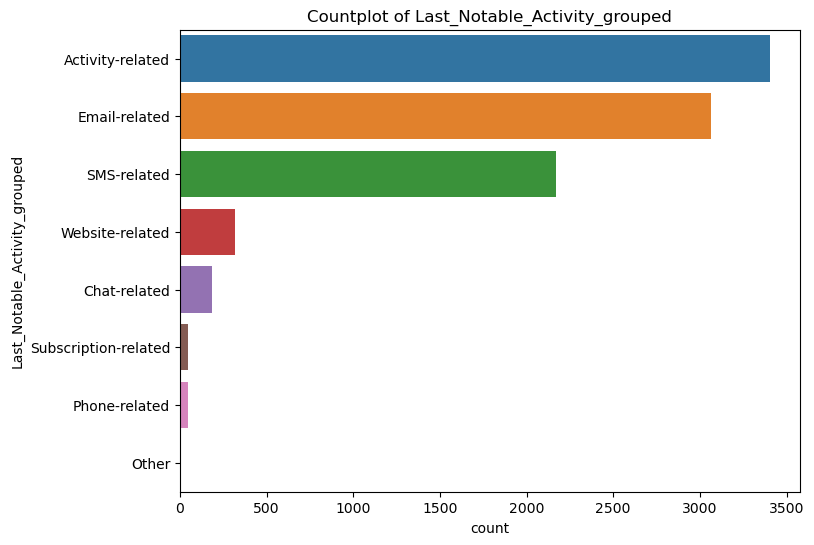

In [59]:
# Visualizing Categorical Data

for col in categorical_features:
    plt.figure(figsize = (8,6))
    sns.countplot(y = df[col], order =df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

### Check Numerical Features

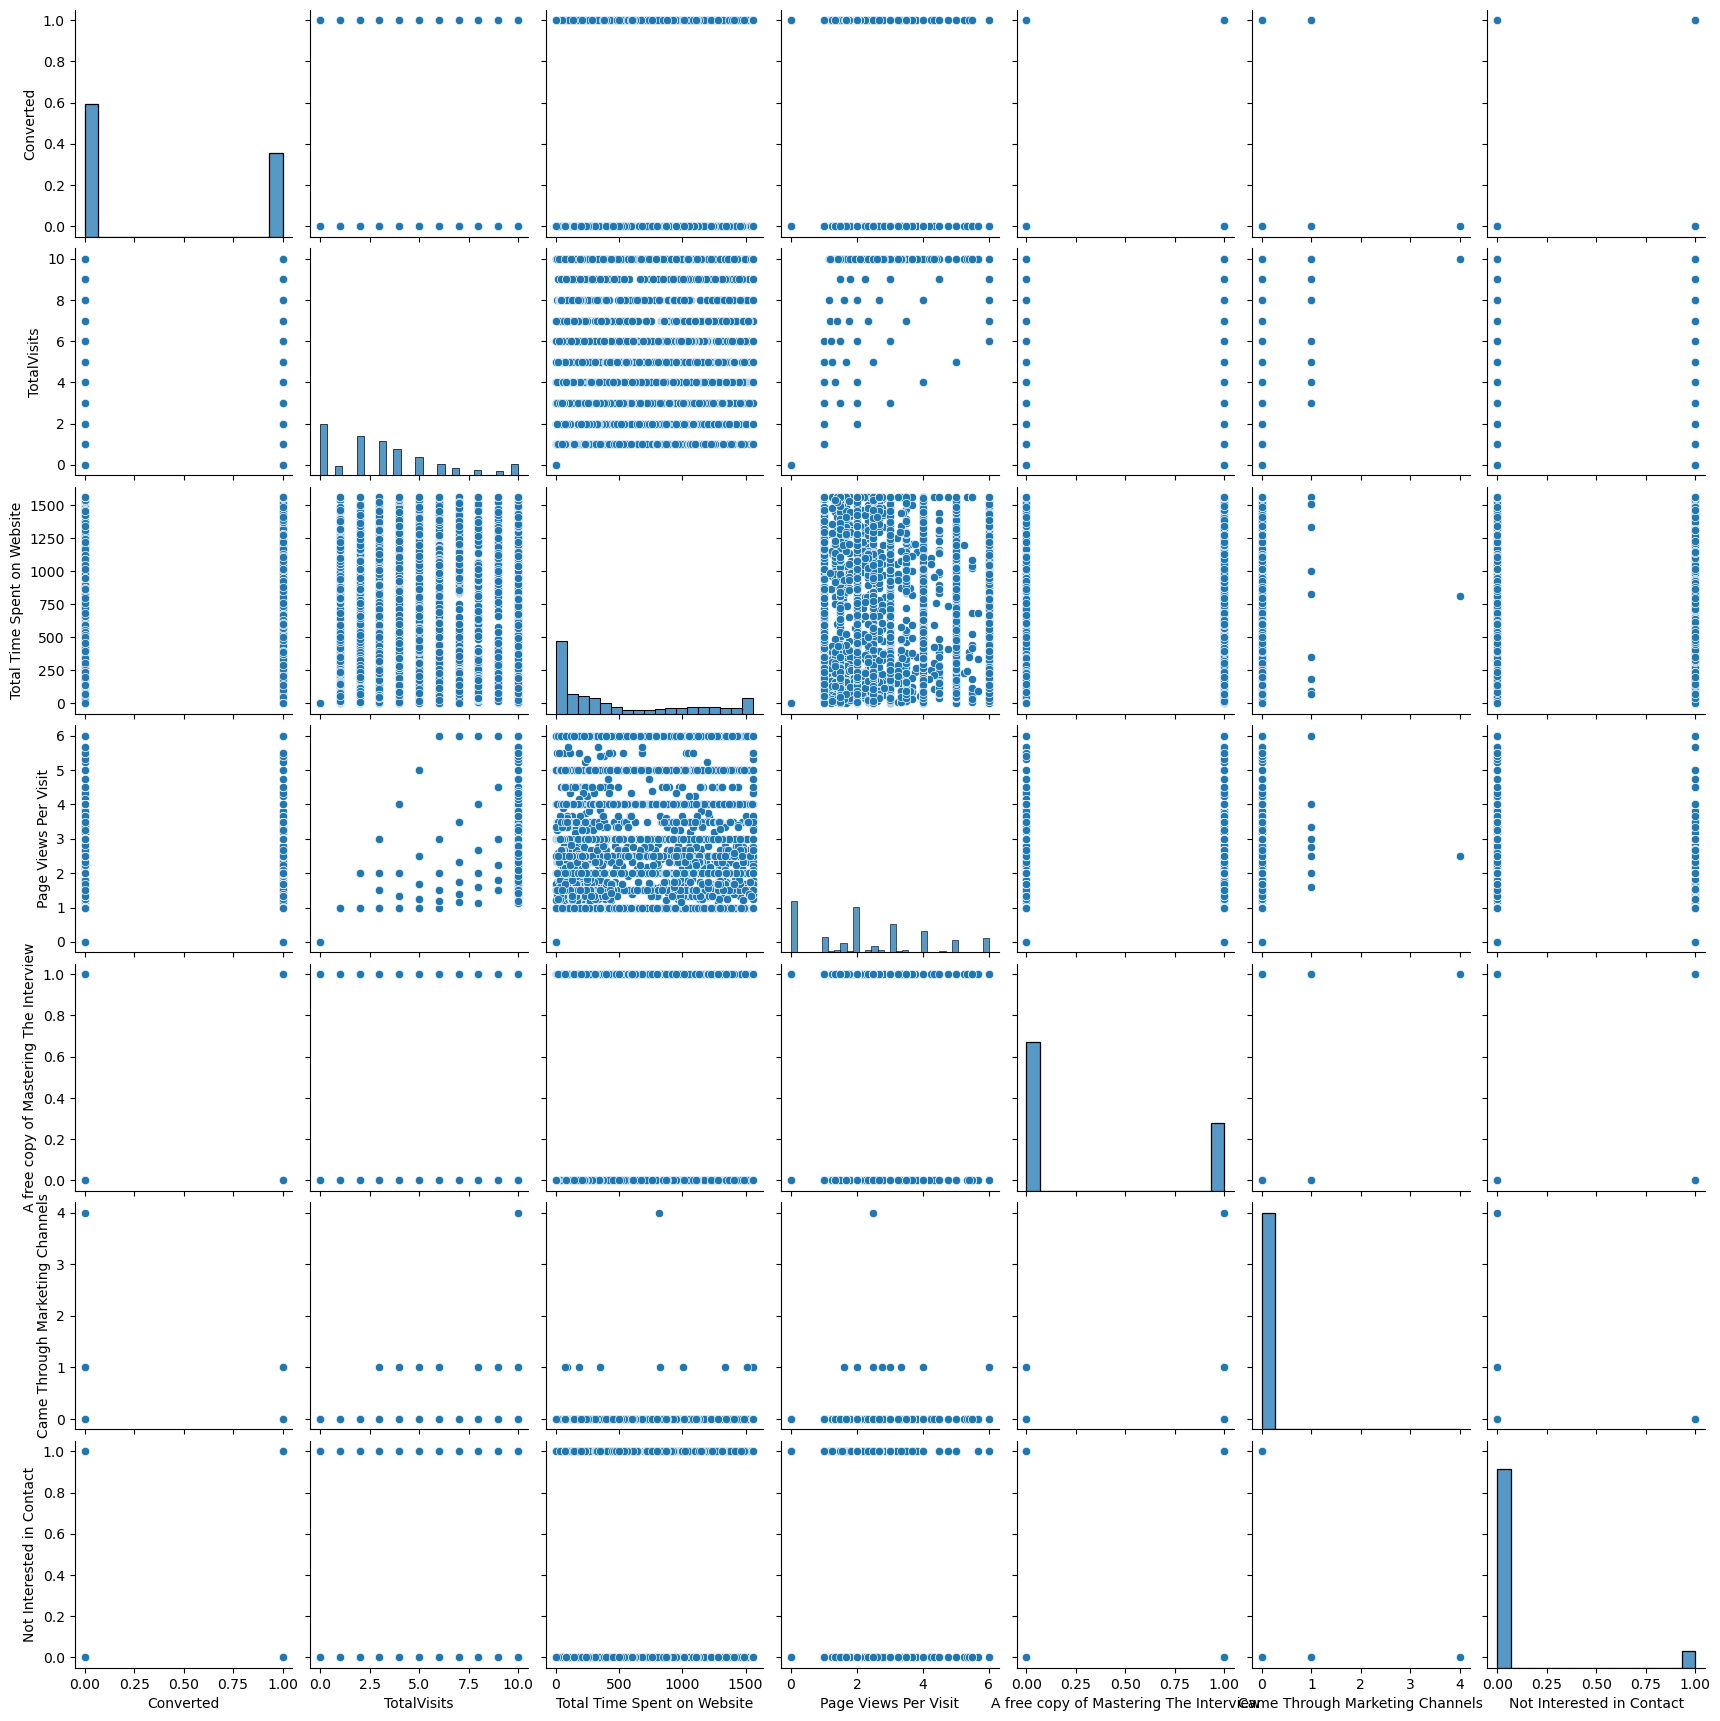

In [60]:
# Visualize Distributions of Numerical feature
# Get all numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Visualize using Pair Plot as we have only 8 numerical features
sns.pairplot(df[numerical_features])  
plt.show()


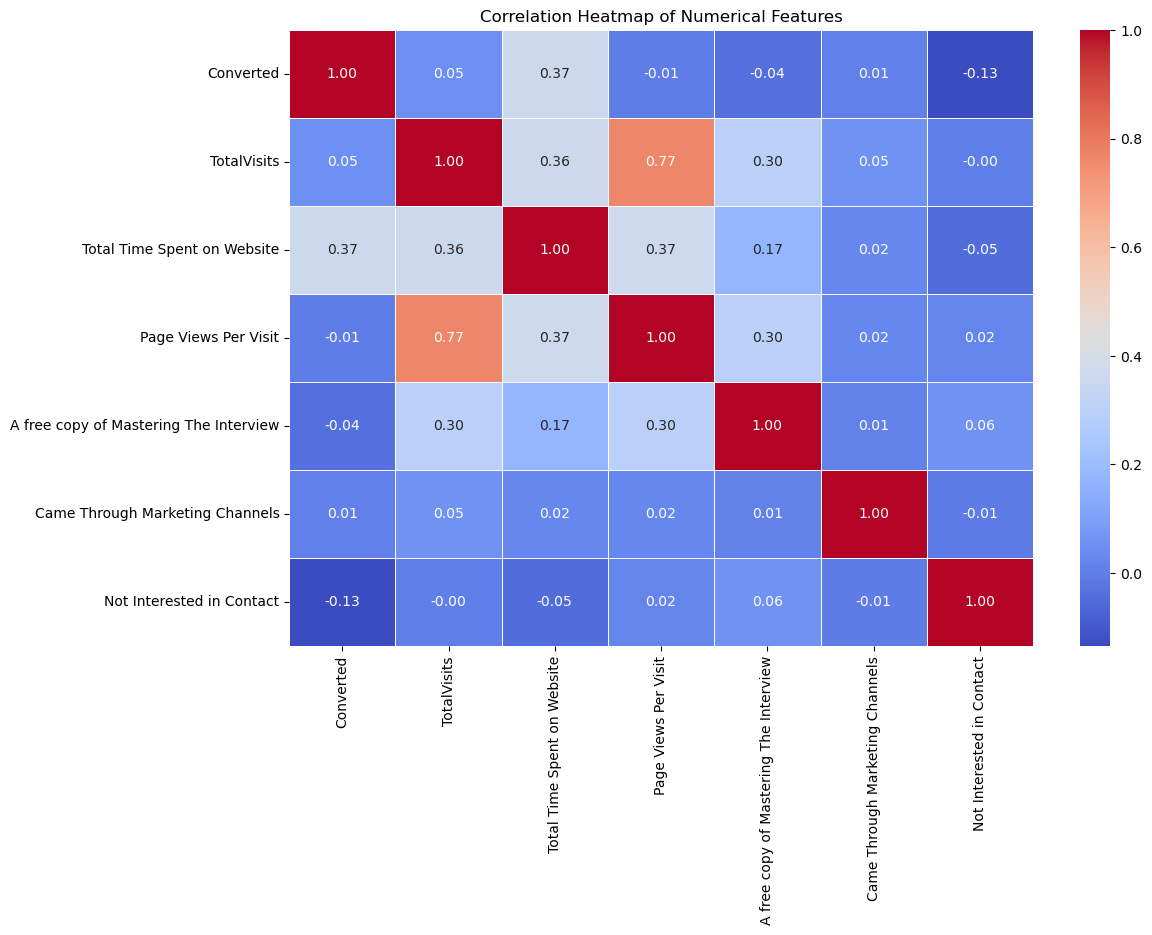

In [61]:
# Calculate the correlation matrix for the numerical features
corr_matrix = df[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### 3.3 Segemented Univariate Analysis

In [62]:
# Segment the data based on Target variable 'Converted'

converted_data = df[df['Converted'] == 1]
not_converted_data = df[df['Converted'] == 0]
    

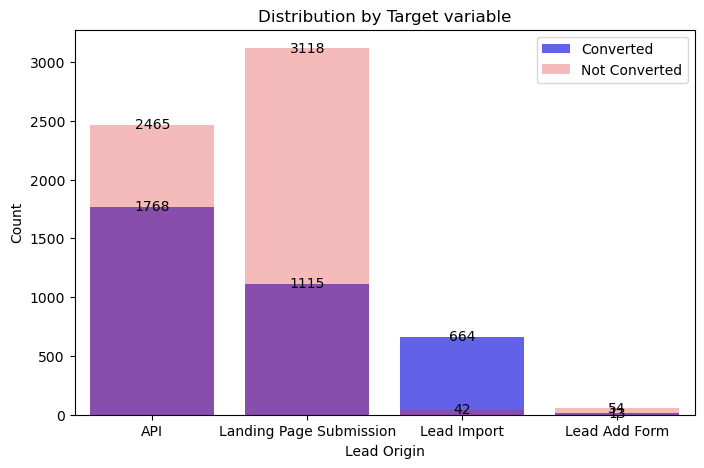

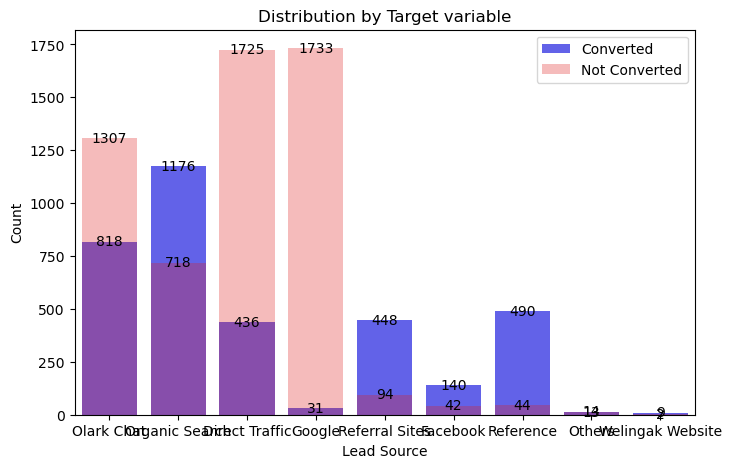

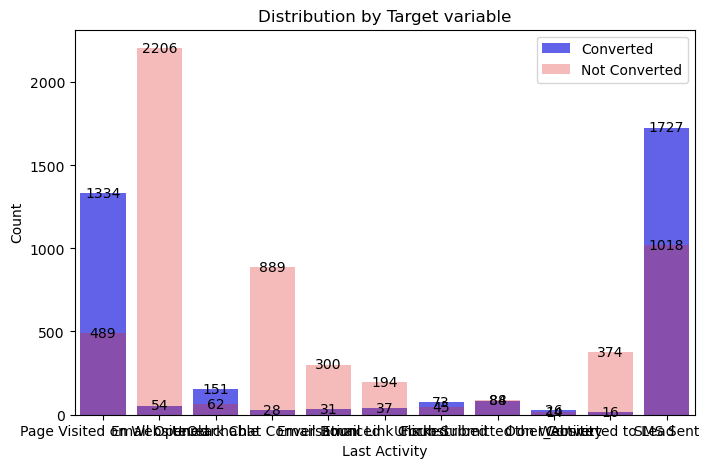

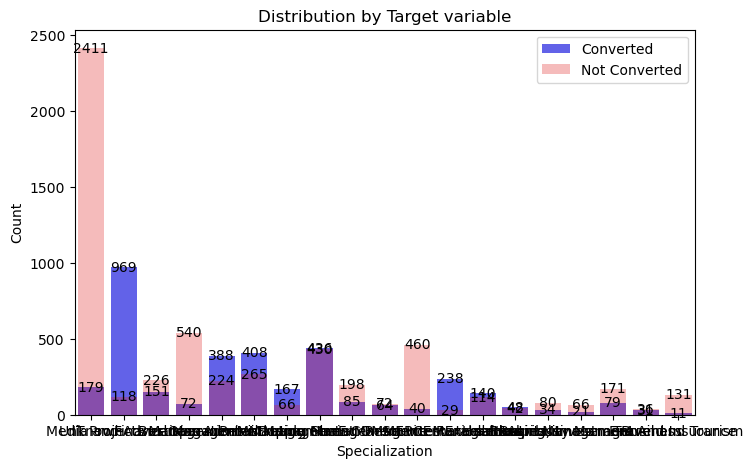

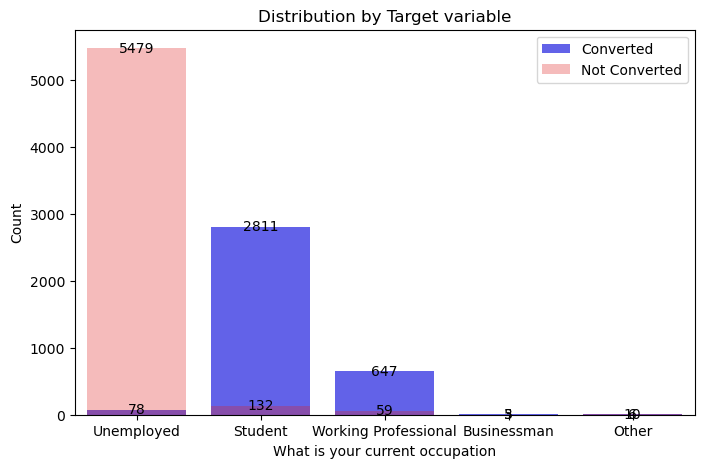

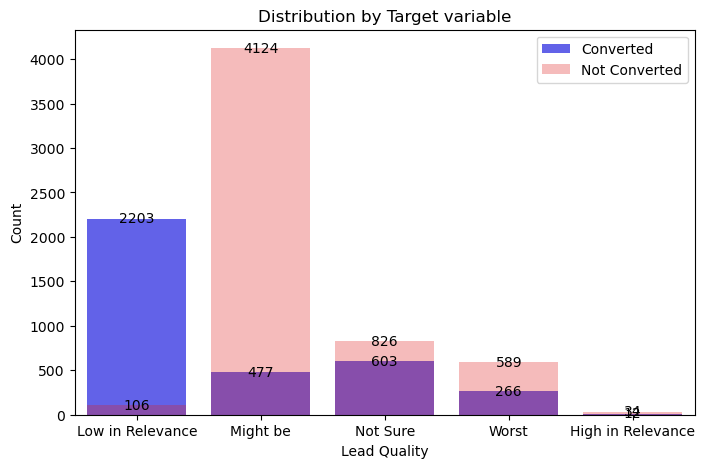

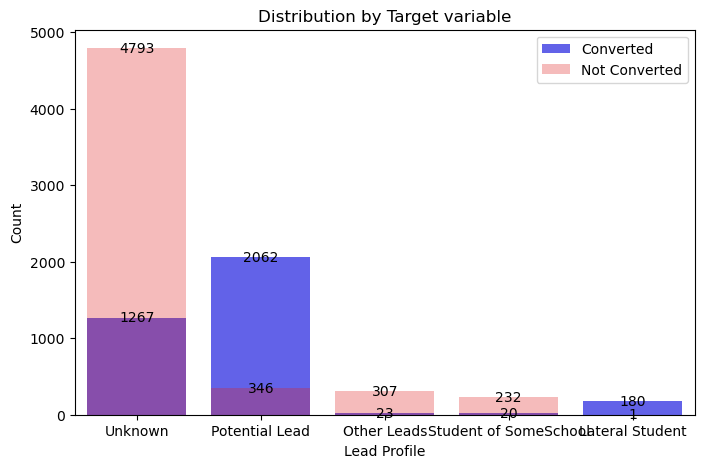

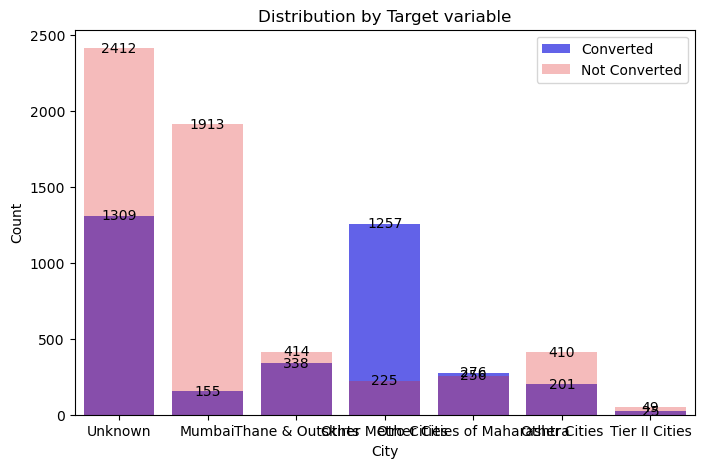

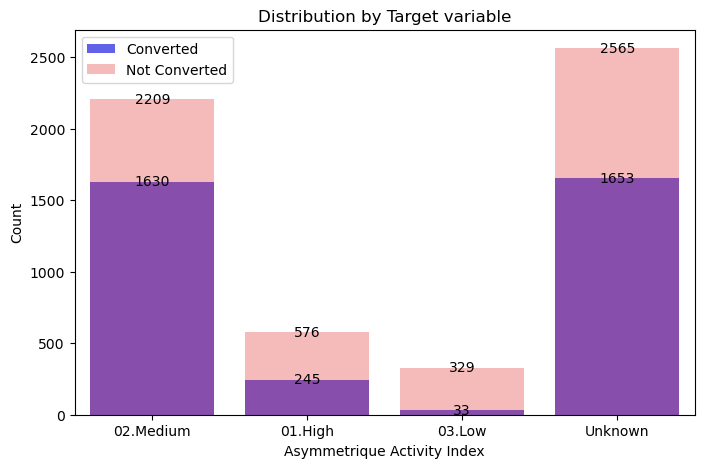

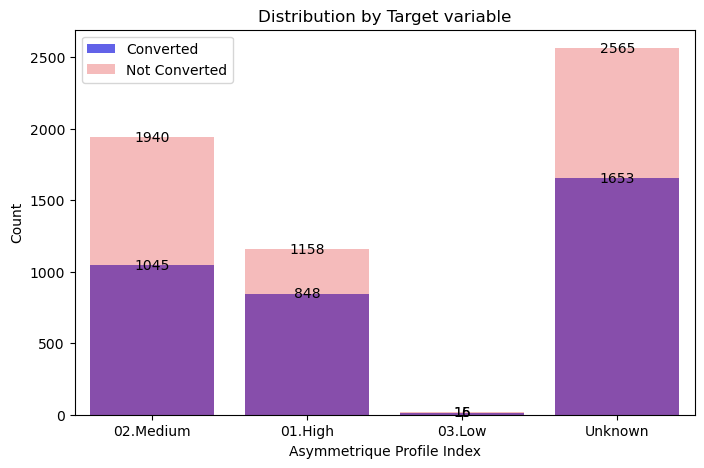

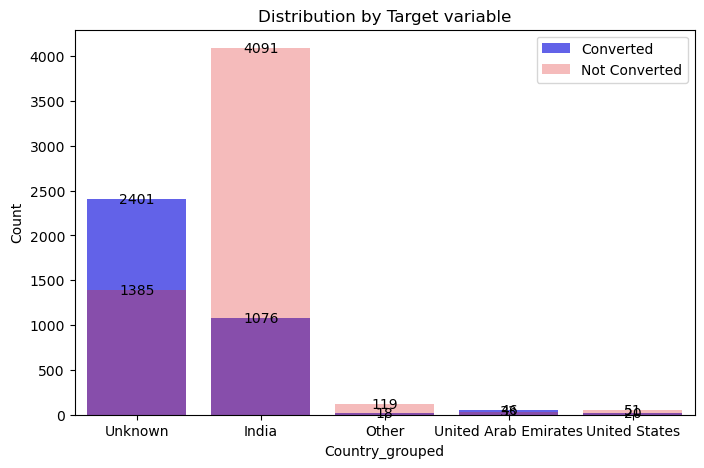

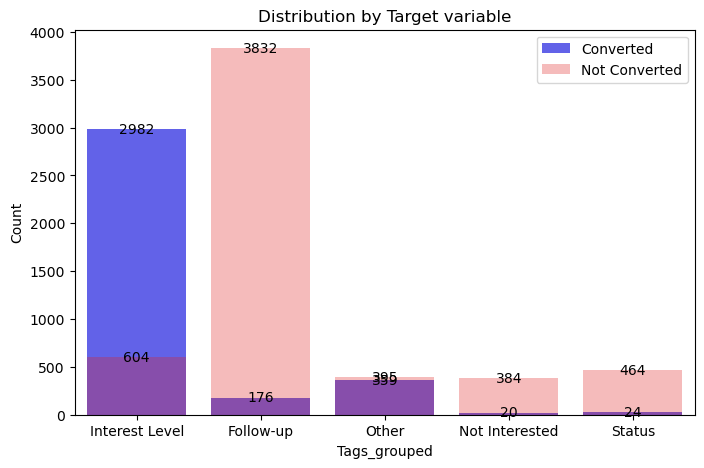

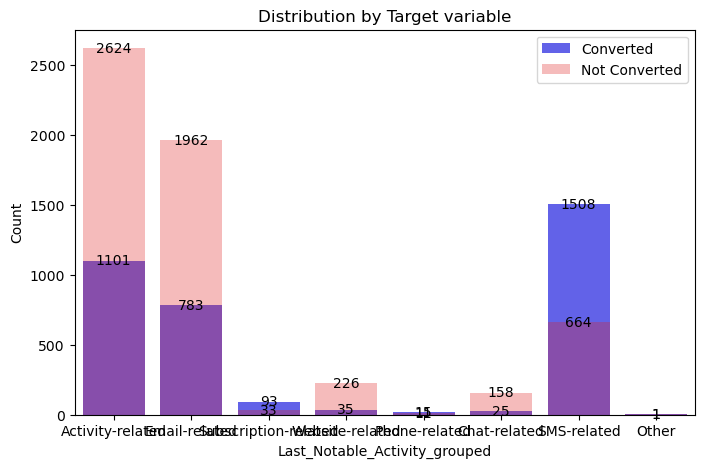

In [63]:
for col in categorical_features:
    plt.figure(figsize=(8,5))
    
    # Split the data by 'Converted' status
    converted_data = df[df['Converted'] == 1]
    not_converted_data = df[df['Converted'] == 0]
    
    # Plot converted data
    ax = sns.countplot(x=col, data=converted_data, color='blue', label='Converted', alpha=0.7)
    
    # Plot not converted data
    sns.countplot(x=col, data=not_converted_data, color='red', label='Not Converted', alpha=0.3)
    
    plt.title("Distribution by Target variable")
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add annotations for counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', color='black', size=10)
    
    plt.legend()
    plt.show()


### 3.4. Correlation with the Target variable

#### Correlation Analysis on Numerical features

Converted                                 1.000000
TotalVisits                               0.045568
Total Time Spent on Website               0.365876
Page Views Per Visit                     -0.005289
A free copy of Mastering The Interview   -0.039820
Came Through Marketing Channels           0.005017
Not Interested in Contact                -0.134402
dtype: float64


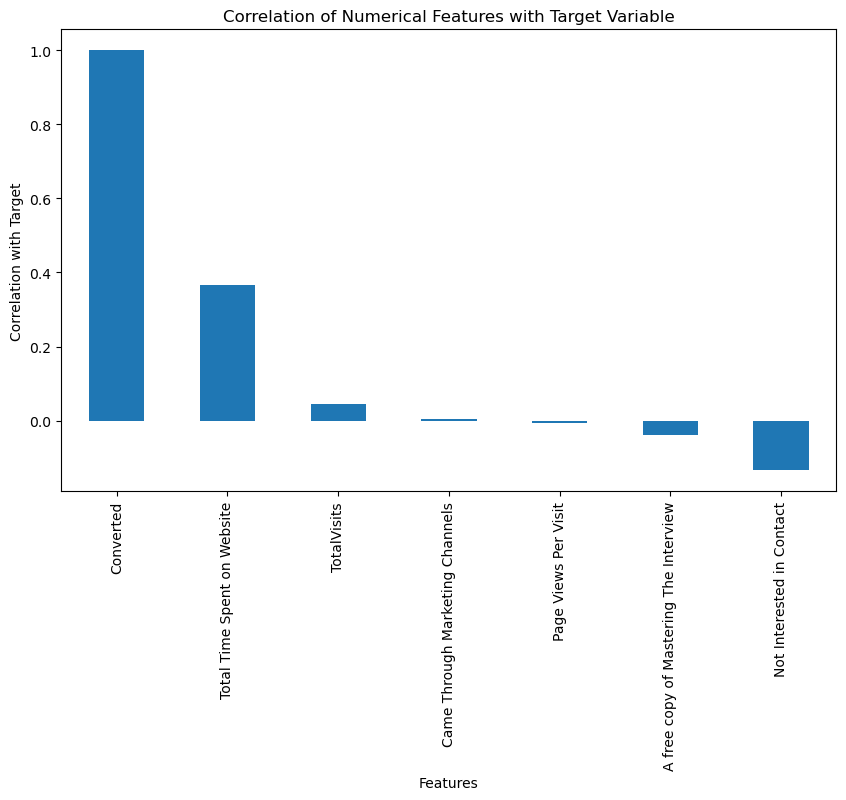

In [64]:
# Calculate the correlation of numerical features with the target variable 'Converted'
corr_with_target = df[numerical_features].corrwith(df['Converted'])

# Print the correlation values
print(corr_with_target)

# Visualize the correlation with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_with_target.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Numerical Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.show()


#### Observations:

    -From the correlation analysis, it appears that Total Time Spent on Website is the most important feature in predicting whether a lead will convert. 
    -Other features also show some influence, but it is relatively weak.

#### Correlation Analysis on Categorical features

In [65]:
# Iterate through categorical features and apply chi-square test
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Converted'])
    
    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the p-value for each feature
    print(f"Chi-Square Test for {feature}: p-value = {p}")


Chi-Square Test for Lead Origin: p-value = 1.93831790477878e-211
Chi-Square Test for Lead Source: p-value = 5.807287885111543e-220
Chi-Square Test for Last Activity: p-value = 2.20756149499419e-299
Chi-Square Test for Specialization: p-value = 2.71408416228191e-46
Chi-Square Test for What is your current occupation: p-value = 2.0048634168048997e-200
Chi-Square Test for Lead Quality: p-value = 0.0
Chi-Square Test for Lead Profile: p-value = 0.0
Chi-Square Test for City: p-value = 3.858123849309725e-10
Chi-Square Test for Asymmetrique Activity Index: p-value = 1.1014830296533056e-39
Chi-Square Test for Asymmetrique Profile Index: p-value = 5.126283990633163e-33
Chi-Square Test for Country_grouped: p-value = 1.53479763840092e-09
Chi-Square Test for Tags_grouped: p-value = 1.3420084999870018e-132
Chi-Square Test for Last_Notable_Activity_grouped: p-value = 7.692313858756043e-281


#### Observations:

    -Focus on the highly significant features while building the predictive model. 
    -These features are likely to have the most impact on lead conversion and should be prioritized for further analysis and inclusion in your logistic regression model.

## Step 4:Data Preparation

    1. Splitting the data into training and test sets
    2. Feature Engineering
    3. Feature Scaling
    4. Correlation Analysis

### 4.1. Split the Data into Training and Testing Sets

In [66]:
# Splitting the data into features and target
X = df.drop(columns=['Converted'])
y = df['Converted']

# Splitting into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)


### 4.2. Feature Engineering

    -We can use Ordinal Encoding, for the Ordinal columns where each category is mapped to a unique integer that reflects its ranking or position.
    -The remaining categorical columns have more unique values.
    -We can apply Target Encoding for those columns as this reduces dimensionality.


In [67]:
# Check fo the missing value counts 
for col in categorical_features:
    print(f"Missing values in column '{col}': {df[col].isnull().sum()}")

Missing values in column 'Lead Origin': 0
Missing values in column 'Lead Source': 0
Missing values in column 'Last Activity': 0
Missing values in column 'Specialization': 0
Missing values in column 'What is your current occupation': 0
Missing values in column 'Lead Quality': 0
Missing values in column 'Lead Profile': 0
Missing values in column 'City': 0
Missing values in column 'Asymmetrique Activity Index': 0
Missing values in column 'Asymmetrique Profile Index': 0
Missing values in column 'Country_grouped': 0
Missing values in column 'Tags_grouped': 0
Missing values in column 'Last_Notable_Activity_grouped': 0


#### 4.2.1.Handling Ordinal Features using Ordinal Encoding

In [68]:
# Initialize the OrdinalEncoder with handle_unknown='use_encoded_value'
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# List of columns to be label encoded
columns_to_encode = ['Lead Quality', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']

# Apply Ordinal Encoding to each column in the training set
X_train[columns_to_encode] = ordinal_encoder.fit_transform(X_train[columns_to_encode])

# Apply Ordinal Encoding to each column in the test set, don't fit
X_test[columns_to_encode] = ordinal_encoder.transform(X_test[columns_to_encode])

# Check the result
print(X_train[columns_to_encode].head())



      Lead Quality  Asymmetrique Profile Index  Asymmetrique Activity Index
9067           3.0                         0.0                          1.0
6093           2.0                         3.0                          3.0
855            2.0                         1.0                          1.0
6053           3.0                         3.0                          3.0
292            2.0                         0.0                          1.0


#### 4.2.2. Handling Nominal Features 

#### Target Encoding

In [69]:
# Install category-encoders
!pip install category-encoders

In [70]:
# Import the encoder library
import category_encoders as ce

In [71]:
# To display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [72]:
# Apply Target Encoding to the nominal columns
target_encoding_cols = ['Specialization', 'Last Activity', 'Lead Source','Country_grouped', 'City', 'Lead Origin', 'Lead Profile',  
    'What is your current occupation', 'Tags_grouped','Last_Notable_Activity_grouped']

# Initialize the TargetEncoder
target_encoder = ce.TargetEncoder(cols=target_encoding_cols)

# Fit and transform the training data for target encoding columns only
X_train[target_encoding_cols] = target_encoder.fit_transform(X_train[target_encoding_cols], y_train)

# Transform the test data using the fitted encoder
X_test[target_encoding_cols] = target_encoder.transform(X_test[target_encoding_cols])

print(X_train.head())

      Lead Origin  Lead Source  TotalVisits  Total Time Spent on Website  \
9067     0.363566     0.401889          2.0                        332.0   
6093     0.307853     0.401889          3.0                        414.0   
855      0.307853     0.376780          5.0                       1092.0   
6053     0.363566     0.401889          5.0                         16.0   
292      0.363566     0.327965         10.0                        194.0   

      Page Views Per Visit  Last Activity  Specialization  \
9067                   2.0       0.377246        0.454545   
6093                   1.5       0.639390        0.282336   
855                    5.0       0.711494        0.282336   
6053                   5.0       0.639390        0.435737   
292                    6.0       0.377246        0.500000   

      What is your current occupation  Lead Quality  Lead Profile      City  \
9067                         0.338311           3.0      0.785118  0.457429   
6093              

In [73]:
# Align train and test sets (to handle missing categories in test set)
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns in test set

# Ensure test set columns match train set
X_test = X_test[X_train.columns]

# Step 5: Print shape to verify
print(X_train.shape, X_test.shape)

(7392, 19) (1848, 19)


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 9067 to 3414
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7392 non-null   float64
 1   Lead Source                             7392 non-null   float64
 2   TotalVisits                             7392 non-null   float64
 3   Total Time Spent on Website             7392 non-null   float64
 4   Page Views Per Visit                    7392 non-null   float64
 5   Last Activity                           7392 non-null   float64
 6   Specialization                          7392 non-null   float64
 7   What is your current occupation         7392 non-null   float64
 8   Lead Quality                            7392 non-null   float64
 9   Lead Profile                            7392 non-null   float64
 10  City                                    7392 non-null   f

### 4.3. Feature scaling

In [75]:
# Identify the continuous numeric columns (including both float64 and int64)
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Identify binary features (those with only two unique values, typically 0 and 1)
binary_cols = [col for col in numeric_columns if X_train[col].nunique() == 2]

# Exclude binary features from the list of columns to scale
columns_to_scale = [col for col in numeric_columns if col not in binary_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the continuous features (excluding binary features)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Check the scaled data
print(X_train_scaled.head())


      Lead Origin  Lead Source  TotalVisits  Total Time Spent on Website  \
9067    -0.135220     0.097820    -0.423851                    -0.279082   
6093    -0.479853     0.097820    -0.058985                    -0.123920   
855     -0.479853    -0.052243     0.670747                     1.159002   
6053    -0.135220     0.097820     0.670747                    -0.877022   
292     -0.135220    -0.343981     2.495078                    -0.540207   

      Page Views Per Visit  Last Activity  Specialization  \
9067             -0.144297      -0.041004        0.793678   
6093             -0.424119       1.297521       -1.185789   
855               1.534636       1.665689       -1.185789   
6053              1.534636       1.297521        0.577481   
292               2.094280      -0.041004        1.316156   

      What is your current occupation  Lead Quality  Lead Profile      City  \
9067                        -0.294665      1.127398      2.066368  1.783505   
6093              

### 4.4.Correlation Analysis

In [76]:
### Checking the Conversion Rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

38.53896103896104

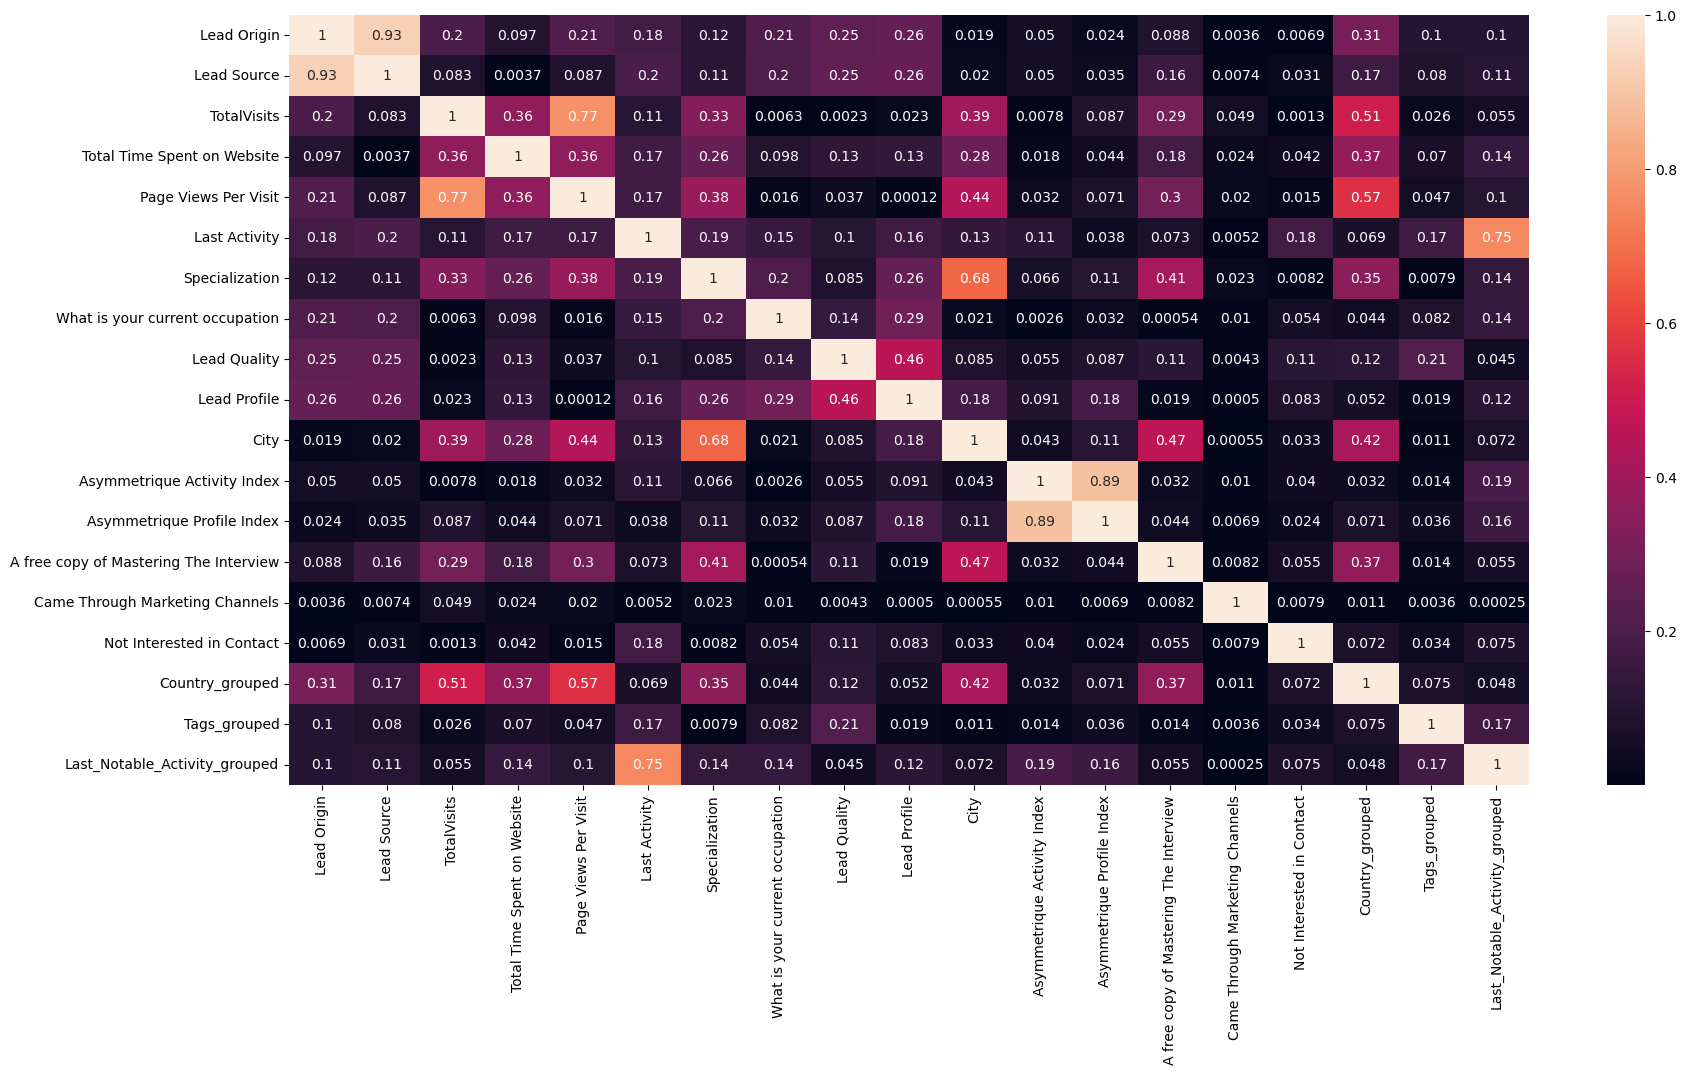

In [77]:
# Perform correlation Analysis on the training dataset

corr_matrix_train = X_train_scaled.corr().abs()

plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix_train,annot = True)
plt.show()

#### Observations:
     - Features with stronger correlations are likely critical predictors for scoring leads.
     - Many features appear to have low correlation, that might not have strong mutlicollinearity   

    

## Step 5: Model Building

    -The data is prepared and preprocessed, the next step is to build the predictive model using logistic regression.
    -The goal is to develop a model to predict the likelihood of a lead converting into a customer.
            1. Model Selection
            2. Model Training
                        


### 5.1.Model Selection

    -Logistic Regression, a binary classification algorithm suitable for predicting the likelihood of a lead converting (converted = 1) or not converting (converted = 0).
	-Logistic regression outputs a probability score between 0 and 1, which can be scaled to a 0-100 lead score by multiplying the probability by 100.


### 5.2.Model Training
        
        1.Fit the model
        2.Feature Selection Using RFE    
        3.Make Predictions
        4.Actual Vs Predicted
        5.Confusion Matrix
        6.Checking VIF
        5.Refine the Model and repeat the steps until get good VIf and p-values
        
        

#### 5.2.1. Fit the Model for the Train set
    -As we are dealing with the imbalanced classes(more non-converted leads than converted leads), use class weights to penalize misclassification of the minority class more heavily.
    

In [78]:
# Build the initial Model
# Initialize and train the Logistic Regression model
# Fit the model using GLM with logistic regression

# Compute class weights
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Add constant to the feature set
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model using GLM with logistic regression
logm1 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial(), weights=class_weights)


#### Train using 'statsmodels'

    -The summary will provide insights into the coefficients and statistical significance of each feature.

In [79]:
 # Detailed statistical summary
logm1_result = logm1.fit()
logm1_result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.7
Date:                Mon, 17 Mar 2025   Deviance:                       4777.4
Time:                        21:08:22   Pearson chi2:                 9.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4969
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6215      0.054    -11.549      0.000      -0.727      -0.516
Lead Origin                                0.4792      0.119      4.021      0.000       0.246       0.713
Lead Source                                0.1666      0.114      1.457      0.145      -0.057       0.391
TotalVisits                                0.3046      0.057      5.306      0.000       0.192       0.417
Total Time Spent on Website                1.1138      0.043     25.895      0.000       1.029       1.198
Page Views Per Visit                      -0.4687      0.063     -7.438      0.000      -0.592      -0.345
Last Activity                              0.5263      0.060      8.817      0.000       0.409       0.643
Specialization                             0.2283      0.058      3.960      0.000       0.115       0.341
What is your current occupation            0.6366      0.059     10.713      0.000       0.520       0.753
Lead Quality                              -1.0941      0.061    -17.894      0.000      -1.214      -0.974
Lead Profile                               0.5572      0.049     11.464      0.000       0.462       0.652
City                                      -0.1562      0.059     -2.660      0.008      -0.271      -0.041
Asymmetrique Activity Index               -0.4747      0.091     -5.225      0.000      -0.653      -0.297
Asymmetrique Profile Index                 0.4564      0.094      4.867      0.000       0.273       0.640
A free copy of Mastering The Interview    -0.1974      0.099     -1.995      0.046      -0.391      -0.003
Came Through Marketing Channels           -0.0360      0.045     -0.801      0.423      -0.124       0.052
Not Interested in Contact                 -0.9084      0.173     -5.261      0.000      -1.247      -0.570
Country_grouped                            0.3391      0.059      5.711      0.000       0.223       0.456
Tags_grouped                               0.7196      0.060     11.974      0.000       0.602       0.837
Last_Notable_Activity_grouped              0.5804      0.054     10.705      0.000       0.474       0.687
==========================================================================================================
"""

#### Observations
    - These variables don't significantly contribute to the model
            -Lead Source (0.1666, p=0.145)
            -Came Through Marketing Channels (-0.0360, p=0.423)

    -Since their p-values are high, they can be considered for removal in model optimization.

#### 5.2.2. Feature Selection Using RFE

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Ensure you have instantiated the model

# Corrected RFE initialization
rfe = RFE(estimator=logreg, n_features_to_select=15)  

# Fit RFE
rfe = rfe.fit(X_train_scaled, y_train)


In [81]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True])

In [82]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', False, 2),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Specialization', False, 3),
 ('What is your current occupation', True, 1),
 ('Lead Quality', True, 1),
 ('Lead Profile', True, 1),
 ('City', False, 4),
 ('Asymmetrique Activity Index', True, 1),
 ('Asymmetrique Profile Index', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Came Through Marketing Channels', False, 5),
 ('Not Interested in Contact', True, 1),
 ('Country_grouped', True, 1),
 ('Tags_grouped', True, 1),
 ('Last_Notable_Activity_grouped', True, 1)]

In [83]:
# Viewing columns selected by RFE
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Not Interested in Contact',
       'Country_grouped', 'Tags_grouped', 'Last_Notable_Activity_grouped'],
      dtype='object')

In [84]:
X_train_scaled.columns[~rfe.support_]

Index(['Lead Source', 'Specialization', 'City',
       'Came Through Marketing Channels'],
      dtype='object')

In [85]:
# Retrain the Model
# Initialize and train the Logistic Regression model
# Fit the model using GLM with logistic regression

# Compute class weights
class_weights2 = compute_sample_weight(class_weight='balanced', y=y_train)

# Add constant to the feature set
X_train_const2 = sm.add_constant(X_train_scaled[selected_features])

# Fit the model using GLM with logistic regression
logm2 = sm.GLM(y_train, X_train_const2, family=sm.families.Binomial(), weights=class_weights2)


In [86]:
 # Detailed statistical summary
logm2_result = logm2.fit()
logm2_result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2397.9
Date:                Mon, 17 Mar 2025   Deviance:                       4795.9
Time:                        21:08:28   Pearson chi2:                 8.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6244      0.052    -12.026      0.000      -0.726      -0.523
Lead Origin                                0.6483      0.052     12.536      0.000       0.547       0.750
TotalVisits                                0.3060      0.057      5.370      0.000       0.194       0.418
Total Time Spent on Website                1.1224      0.043     26.318      0.000       1.039       1.206
Page Views Per Visit                      -0.4457      0.061     -7.263      0.000      -0.566      -0.325
Last Activity                              0.5226      0.059      8.800      0.000       0.406       0.639
What is your current occupation            0.6456      0.059     11.013      0.000       0.531       0.760
Lead Quality                              -1.0837      0.061    -17.868      0.000      -1.203      -0.965
Lead Profile                               0.5619      0.048     11.770      0.000       0.468       0.655
Asymmetrique Activity Index               -0.4354      0.088     -4.947      0.000      -0.608      -0.263
Asymmetrique Profile Index                 0.4173      0.091      4.579      0.000       0.239       0.596
A free copy of Mastering The Interview    -0.2154      0.086     -2.502      0.012      -0.384      -0.047
Not Interested in Contact                 -0.9324      0.172     -5.423      0.000      -1.269      -0.595
Country_grouped                            0.2987      0.055      5.476      0.000       0.192       0.406
Tags_grouped                               0.7197      0.060     11.961      0.000       0.602       0.838
Last_Notable_Activity_grouped              0.5887      0.054     10.895      0.000       0.483       0.695
==========================================================================================================
"""

#### Observations:
-	The Pseudo R-squared (0.4957) indicates that the model explains around 50% of the variance in lead conversion — moderate to  strong for a logistic regression model.



#### 5.2.3. Make Predictions 

In [87]:
# Get predicted probabilities on the train set 
y_train_pred = logm2_result.predict(X_train_const2)

# Check the first 10 predictions
y_train_pred[:10]


9067    0.066754
6093    0.281654
855     0.544951
6053    0.119310
292     0.097666
2550    0.171244
2502    0.578801
3218    0.564538
585     0.699182
610     0.679131
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.066754  , 0.28165436, 0.54495127, 0.1193103 , 0.09766552,
       0.17124393, 0.57880132, 0.56453778, 0.69918206, 0.67913089])

#### 5.2.4. Actual Vs Predicted

#### Creating a dataframe with the actual converted and the predicted probabilities which helps in decision making

In [89]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,1,0.066754,9067
1,0,0.281654,6093
2,1,0.544951,855
3,0,0.119310,6053
4,0,0.097666,292


#### Convert predicted probabilities to binary class predictions (0 or 1) using a threshold of 0.5

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.tail()

,Converted,Converted_Prob,LeadID,Predicted
7387,0,0.000177,8331,0
7388,1,0.993253,2105,1
7389,0,0.681106,8667,1
7390,1,0.996039,2490,1
7391,0,0.617740,3414,1


#### 5.2.5. Assess Using confusion Matrix

In [91]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(conf_matrix)

[[4114  429]
 [ 585 2264]]


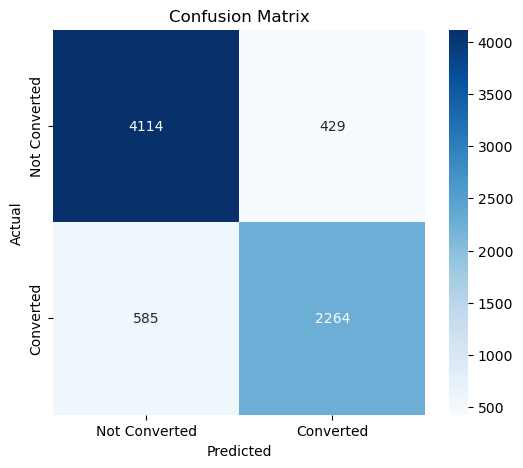

In [92]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Observations

    - True Negative (TN) = 4114: These are the leads that were predicted as not converted (0) and actually not converted.
    - False Positive (FP) = 429: These are the leads that were predicted as converted (1) but actually not converted.
    - False Negative (FN) = 585: These are the leads that were predicted as not converted (0) but actually converted.
    - True Positive (TP) = 2264: These are the leads that were predicted as converted (1) and actually converted.

In [93]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8628246753246753


#### Observations

    -The overall accuracy of your model on the training set is approximately 0.8628%.

    -This means that about 86.28% of the predictions made by the model (whether a lead would convert or not) are correct, which is a strong performance.

#### 5.2.6.Checking VIF

In [94]:
# Importing the required function for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_const2.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const2.values, i) for i in range(X_train_const2.shape[1])]

# Sort the VIF dataframe in descending order
vif_data = vif_data.sort_values(by = "VIF", ascending = False)

# Display the VIF values
print(vif_data)

                                   Feature       VIF
10              Asymmetrique Profile Index  5.877003
9              Asymmetrique Activity Index  5.724097
4                     Page Views Per Visit  2.848453
5                            Last Activity  2.608859
2                              TotalVisits  2.590945
15           Last_Notable_Activity_grouped  2.455954
13                         Country_grouped  1.813867
0                                    const  1.624957
8                             Lead Profile  1.476065
7                             Lead Quality  1.413701
1                              Lead Origin  1.337365
3              Total Time Spent on Website  1.304747
11  A free copy of Mastering The Interview  1.201276
6          What is your current occupation  1.136500
14                            Tags_grouped  1.125197
12               Not Interested in Contact  1.071385


#### Observations

    - 'Asymmetrique Profile Index  5.877003' and 'Asymmetrique Activity Index  5.724097' has VIF value > 5, so we can try dropping one of them and re-run the model.

In [95]:
# Dropping 'Asymmetrique Profile Index'
selected_features = selected_features.drop('Asymmetrique Profile Index', 1)
selected_features

Index(['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'A free copy of Mastering The Interview',
       'Not Interested in Contact', 'Country_grouped', 'Tags_grouped',
       'Last_Notable_Activity_grouped'],
      dtype='object')

### Retrain the Model

#### Fit the Model

In [96]:
# Retrain the Model after removing the feature
# Initialize and train the Logistic Regression model
# Fit the model using GLM with logistic regression

# Compute class weights
class_weights3 = compute_sample_weight(class_weight='balanced', y=y_train)

# Add constant to the feature set
X_train_const3 = sm.add_constant(X_train_scaled[selected_features])

# Fit the model using GLM with logistic regression
logm3 = sm.GLM(y_train, X_train_const3, family=sm.families.Binomial(), weights=class_weights3)


In [97]:
 # Detailed statistical summary
logm3_result = logm3.fit()
logm3_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2408.6
Date:                Mon, 17 Mar 2025   Deviance:                       4817.2
Time:                        21:08:41   Pearson chi2:                 8.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4942
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6137      0.052    -11.902      0.000      -0.715      -0.513
Lead Origin                                0.6088      0.051     12.052      0.000       0.510       0.708
TotalVisits                                0.2985      0.057      5.271      0.000       0.188       0.410
Total Time Spent on Website                1.1176      0.042     26.310      0.000       1.034       1.201
Page Views Per Visit                      -0.4605      0.061     -7.550      0.000      -0.580      -0.341
Last Activity                              0.4871      0.059      8.292      0.000       0.372       0.602
What is your current occupation            0.6414      0.058     11.005      0.000       0.527       0.756
Lead Quality                              -1.0834      0.061    -17.876      0.000      -1.202      -0.965
Lead Profile                               0.5195      0.047     11.134      0.000       0.428       0.611
Asymmetrique Activity Index               -0.0709      0.038     -1.849      0.065      -0.146       0.004
A free copy of Mastering The Interview    -0.2459      0.086     -2.874      0.004      -0.414      -0.078
Not Interested in Contact                 -0.9478      0.170     -5.559      0.000      -1.282      -0.614
Country_grouped                            0.3345      0.054      6.169      0.000       0.228       0.441
Tags_grouped                               0.7374      0.060     12.313      0.000       0.620       0.855
Last_Notable_Activity_grouped              0.6117      0.054     11.383      0.000       0.506       0.717
==========================================================================================================
"""

#### Make Predictions

In [98]:
# Get predicted probabilities on the train set 
y_train_pred = logm3_result.predict(X_train_const3)

# Check the first 10 predictions
y_train_pred[:10]


9067    0.077430
6093    0.266856
855     0.511878
6053    0.113105
292     0.118389
2550    0.213112
2502    0.638489
3218    0.582609
585     0.687345
610     0.668361
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07743004, 0.26685576, 0.51187822, 0.11310456, 0.11838882,
       0.21311178, 0.63848854, 0.58260903, 0.68734502, 0.66836129])

#### Actual Vs Predicted

In [100]:
#Creating a dataframe with the actual converted and the predicted probabilities which helps in decision making
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Actual_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Actual_Prob,LeadID
0,1,0.077430,9067
1,0,0.266856,6093
2,1,0.511878,855
3,0,0.113105,6053
4,0,0.118389,292


In [101]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Actual_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Actual_Prob,LeadID,Predicted
0,1,0.077430,9067,0
1,0,0.266856,6093,0
2,1,0.511878,855,1
3,0,0.113105,6053,0
4,0,0.118389,292,0


#### Assess Using confusion Matrix

In [102]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(conf_matrix)

[[4108  435]
 [ 599 2250]]


In [103]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8601190476190477


#### Checking VIF

In [104]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_const3.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const3.values, i) for i in range(X_train_const3.shape[1])]

# Sort the VIF dataframe in descending order
vif_data = vif_data.sort_values(by = "VIF", ascending = False)

# Display the VIF values
print(vif_data)

                                   Feature       VIF
4                     Page Views Per Visit  2.828292
2                              TotalVisits  2.590371
5                            Last Activity  2.564351
14           Last_Notable_Activity_grouped  2.422718
12                         Country_grouped  1.776812
0                                    const  1.620330
8                             Lead Profile  1.439905
7                             Lead Quality  1.413637
3              Total Time Spent on Website  1.304576
1                              Lead Origin  1.296124
10  A free copy of Mastering The Interview  1.194703
6          What is your current occupation  1.136402
13                            Tags_grouped  1.110095
11               Not Interested in Contact  1.069344
9              Asymmetrique Activity Index  1.064312


#### Observation

    - All selected features have a VIF below 5, this is our final model with 14 features 
    - Enable same feature selection on the test set


In [105]:
# Transform X_test_scaled to keep only selected features
X_test_scaled = X_test_scaled[selected_features]

#Confirm the shape of the test set
print(X_test_scaled.shape)

(1848, 14)


## Step 6: Model Evaluation

        1.Assessing with Metrics Beyond Simple Accuracy
        2.Plot ROC Curve
        3.Finding the Optimal Cutoff Point
        4.Precision and Recall
        5.Finding Optimal Threshold
        6.Making Predictions on the Test set
        7.Model Evaluation on the Test Set
        8.Calculate Lead Score

### 6.1. Metrics Beyond Accuracy

Calculate the metrics provide more insight into how well the model handles the classes

    - f1_score
    - Sensitivity
    - Specificity
    - False Positive Rate
    - Positive Predictive Value
    - Negative Predictive Value
    

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score 

In [107]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [108]:
# Calculate metrics

f1 = f1_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
FPR = FP/ float(TN+FP)    # False Positive Rate
PPV = TP / float(TP+FP)   # positive predictive value 
NPV = TN / float(TN+ FN)  # Negative predictive value

# Print the metrics

print(f"F1-Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Positive Predictive Value: {PPV:.4f}")
print(f"Negative Predictive value: {NPV:.4f}")


F1-Score: 0.8132
Sensitivity: 0.7898
Specificity: 0.9042
False Positive Rate: 0.0958
Positive Predictive Value: 0.8380
Negative Predictive value: 0.8727


#### Observations

    -The model has strong performance, especially in Positive Predictive Value and specificity, meaning it is good at identifying converted leads without making too many false positives.
    -Sensitivity is 78% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimized in order to get a decent value of sensitivity and for this we will use the ROC curve.
    -The F1-score being 0.88 indicates a good balance between precision and recall, and the false positive rate is low, suggesting that the model is conservative in its positive predictions.

### 6.2. Plot ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

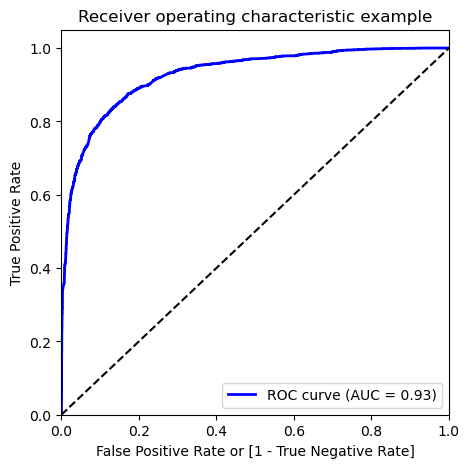

In [109]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Actual_Prob'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#### Observations

    -The curve is well above the diagonal baseline (random classifier), showing strong classification ability.
    -Very low False Positive Rate at high True Positive Rates suggests the model can confidently identify conversions with minimal misclassification.
    -AUC > 0.9 is typically considered outstanding in real-world classification tasks

### 6.3.Finding Optimal Cutoff Point

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Actual_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Actual_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.077430,9067,0,1,0,0,0,0,0,0,0,0,0
1,0,0.266856,6093,0,1,1,1,0,0,0,0,0,0,0
2,1,0.511878,855,1,1,1,1,1,1,1,0,0,0,0
3,0,0.113105,6053,0,1,1,0,0,0,0,0,0,0,0
4,0,0.118389,292,0,1,1,0,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385417  1.000000  0.000000
0.1   0.1  0.709551  0.964900  0.549417
0.2   0.2  0.816694  0.916462  0.754127
0.3   0.3  0.847267  0.863812  0.836892
0.4   0.4  0.856331  0.826957  0.874752
0.5   0.5  0.860119  0.789751  0.904248
0.6   0.6  0.857008  0.727975  0.937926
0.7   0.7  0.844697  0.655318  0.963460
0.8   0.8  0.823052  0.574939  0.978648
0.9   0.9  0.782332  0.454896  0.987673


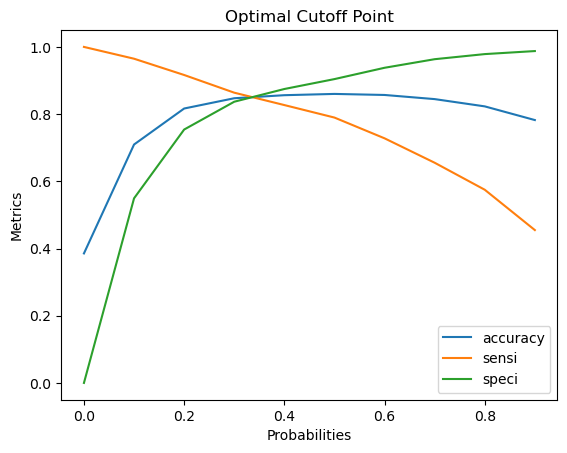

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Optimal Cutoff Point")
plt.xlabel('Probabilities')
plt.ylabel('Metrics')
plt.show()

In [113]:
#Calculate optimalprobability cutoff
youden_index = cutoff_df['sensi'] + cutoff_df['speci'] - 1
optimal_cutoff = cutoff_df.loc[youden_index.idxmax(), 'prob']

print("Optimal Probability Cutoff:", optimal_cutoff)


Optimal Probability Cutoff: 0.4


In [114]:
# Change the threshold 
y_train_pred_final['final_predicted'] = y_train_pred_final.Actual_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Actual_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.077430,9067,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.266856,6093,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.511878,855,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.113105,6053,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.118389,292,0,1,1,0,0,0,0,0,0,0,0,0


In [115]:
# Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8601190476190477

In [116]:
# Assess Using Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion2

array([[4108,  435],
       [ 599, 2250]], dtype=int64)

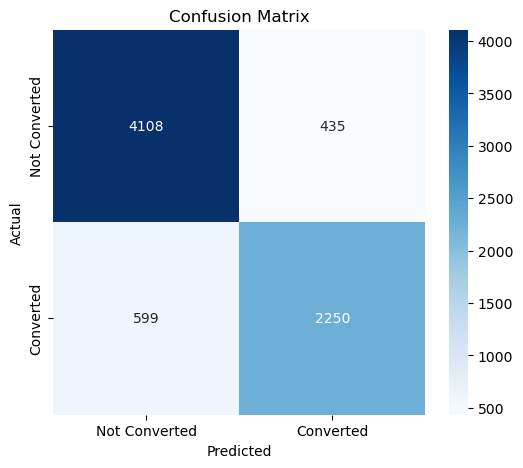

In [117]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Metrics Beyond Accuracy

In [118]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [119]:
# Calculate metrics

f1 = f1_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
FPR = FP/ float(TN+FP)    # False Positive Rate
PPV = TP / float(TP+FP)   # positive predictive value 
NPV = TN / float(TN+ FN)  # Negative predictive value

# Print the metrics

print(f"F1-Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Positive Predictive Value: {PPV:.4f}")
print(f"Negative Predictive value: {NPV:.4f}")

F1-Score: 0.8132
Sensitivity: 0.7898
Specificity: 0.9042
False Positive Rate: 0.0958
Positive Predictive Value: 0.8380
Negative Predictive value: 0.8727


### 6.4. Precision and Recall

In [120]:
# Precision = TP/TP + FP
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

# Recall = TP/TP + FN
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

print("Precision:", Precision)
print("Recall:", Recall)

Precision: 0.8379888268156425
Recall: 0.7897507897507897


#### Observations

    - Precision is 83.80%, meaning that out of all the leads predicted as "converted," about 83.8% actually converted.
    - Recall is 78.98%, meaning that out of all actual conversions, 78.98% were correctly identified by the model.

#### Precision and Recall Tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 7387    0
 7388    1
 7389    0
 7390    1
 7391    0
 Name: Converted, Length: 7392, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 7387    0
 7388    1
 7389    1
 7390    1
 7391    1
 Name: Predicted, Length: 7392, dtype: int64)

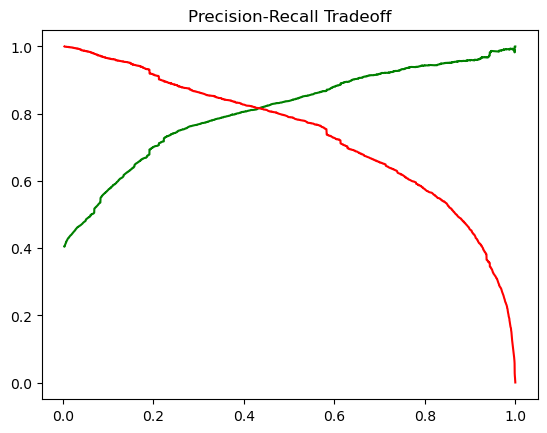

In [123]:
# Precision - Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Actual_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision-Recall Tradeoff')
plt.show()


#### Finding the Optimal Threshold:
    -The ideal threshold is usually where precision and recall balance well.

### 6.5. Making Predictions on the Test Set

In [124]:
# Verify the shape of the test set
X_test_scaled = X_test_scaled[selected_features]
X_test_scaled.shape

(1848, 14)

In [125]:
# Add constant to the test set using the same selected features
X_test_const3 = sm.add_constant(X_test_scaled[selected_features])


In [126]:
# Make Predictions on the test set
y_test_pred = logm3_result.predict(X_test_const3)

In [127]:
y_test_pred[:10]

683     0.427488
1931    0.256870
6950    0.224922
2996    0.019259
3902    0.024198
6828    0.006489
4906    0.410447
5796    0.050867
6388    0.191495
3636    0.093066
dtype: float64

In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_fin = pd.DataFrame(y_test_pred)
y_pred_fin.head()

,0
683,0.427488
1931,0.256870
6950,0.224922
2996,0.019259
3902,0.024198


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Add LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [131]:
# Removing index for both dataframes to append them side by side 
y_pred_fin.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_fin],axis=1)

In [133]:
y_pred_final.head()

,Converted,LeadID,0
0,1,683,0.427488
1,1,1931,0.256870
2,0,6950,0.224922
3,0,2996,0.019259
4,0,3902,0.024198


In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Actual_Prob'})

In [135]:
y_pred_final['final_predicted'] = y_pred_final.Actual_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,LeadID,Actual_Prob,final_predicted
0,1,683,0.427488,1
1,1,1931,0.256870,0
2,0,6950,0.224922,0
3,0,2996,0.019259,0
4,0,3902,0.024198,0


###  6.6.Model Evaluation on the Test Set

In [136]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8371212121212122

In [137]:
# # Compute confusion matrix
confu_matrix_fin = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confu_matrix_fin

array([[969, 167],
       [134, 578]], dtype=int64)

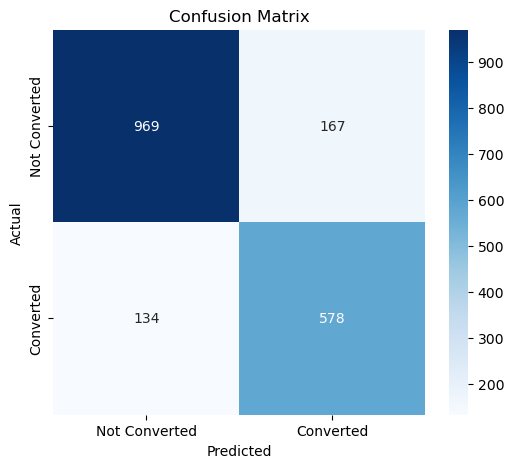

In [138]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confu_matrix_fin, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [139]:
# Calculate Metrics

f1 = f1_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
FPR = FP/ float(TN+FP)    # False Positive Rate
PPV = TP / float(TP+FP)   # positive predictive value 
NPV = TN / float(TN+ FN)  # Negative predictive value

# Print the metrics

print(f"F1-Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Positive Predictive Value: {PPV:.4f}")
print(f"Negative Predictive value: {NPV:.4f}")

F1-Score: 0.7934
Sensitivity: 0.7898
Specificity: 0.9042
False Positive Rate: 0.0958
Positive Predictive Value: 0.8380
Negative Predictive value: 0.8727


In [140]:
# Calculate Precision and Recall
# Precision = TP/TP + FP
Precision = confu_matrix_fin[1,1]/(confu_matrix_fin[0,1]+confu_matrix_fin[1,1])

# Recall = TP/TP + FN
Recall = confu_matrix_fin[1,1]/(confu_matrix_fin[1,0]+confu_matrix_fin[1,1])

print("Precision:", Precision)
print("Recall:", Recall)

Precision: 0.7758389261744967
Recall: 0.8117977528089888


### 6.7. Lead Score

In [141]:
# Calculate the Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Actual_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,LeadID,Actual_Prob,final_predicted,Lead_Score
0,1,683,0.427488,1,43
1,1,1931,0.256870,0,26
2,0,6950,0.224922,0,22
3,0,2996,0.019259,0,2
4,0,3902,0.024198,0,2


In [142]:
# Set option to display max rows
pd.set_option('display.max_rows', None)

In [145]:
# Identifying the Hot Leads based on the Lead Score

In [143]:
# Sort out the Hot Leads
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>85]
hot_leads.head()

,Converted,LeadID,Actual_Prob,final_predicted,Lead_Score
10,1,3685,0.997415,1,100
13,1,9158,0.962401,1,96
22,1,6461,0.998290,1,100
23,1,6475,0.985098,1,99
34,0,745,0.943670,1,94


## Step 7: Model Performance

### Train Vs Test Metrics

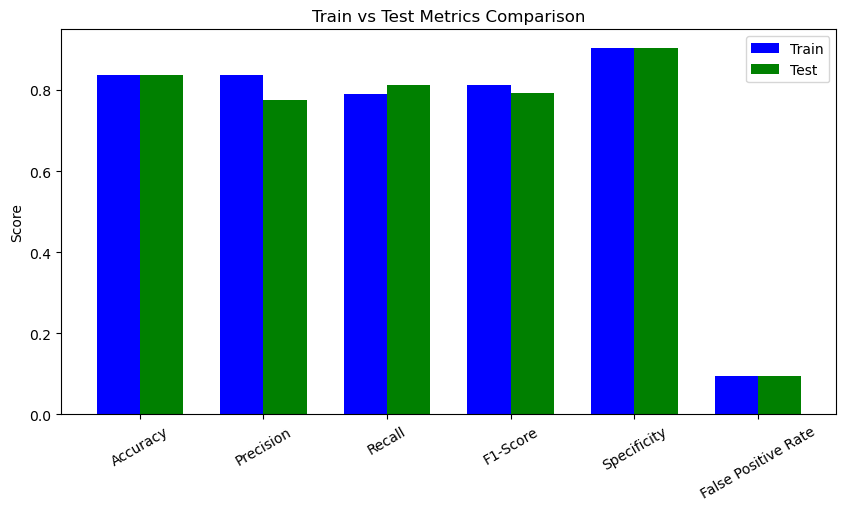

In [144]:
# Metrics for train and test
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'False Positive Rate']
train_values = [0.8371, 0.8380, 0.7898, 0.8132, 0.9042, 0.0958]
test_values = [0.8371, 0.7758, 0.8118, 0.7934, 0.9042, 0.0958]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='green')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Train vs Test Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=30)
ax.legend()
plt.show()


### Insights from Model Comparison:

- Consistent Accuracy – The accuracy on the test set closely matches the train set, indicating strong generalization and minimal overfitting.
- High Specificity – The model effectively identifies non-converting leads, ensuring minimal wasted effort on low-potential leads.
- Balanced Recall – The recall remains stable between train and test, meaning the model consistently captures potential conversions.
- Strong F1-Score – A good balance between precision and recall ensures reliable lead prioritization.
- Low False Positive Rate – The model minimizes incorrect classifications, reducing unnecessary sales efforts on unlikely conversions.

## Conclusion
With high accuracy, strong recall, and an effective lead scoring mechanism, the project has successfully achieved its goal in identifying the most promising leads.